## Проект: Обучение с учителем: качество модели

&emsp;&emsp; Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. 

&emsp;&emsp; Нам поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Для решения данной задачи необходимо:

- промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
- собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
- Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
- В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
- Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Данные содержат 4 датасета:

датасет <b>market_file.csv</b>, содержащий информацию о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. В нем содержаться следующие столбцы:

- <b>id</b> — номер покупателя в корпоративной базе данных.
- <b>Покупательская активность</b> — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- <b>Тип сервиса</b> — уровень сервиса, например «премиум» и «стандарт».
- <b>Разрешить сообщать</b> — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- <b>Маркет_актив_6_мес</b> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- <b>Маркет_актив_тек_мес</b> — количество маркетинговых коммуникаций в текущем месяце.
- <b>Длительность</b> — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- <b>Акционные_покупки</b> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- <b>Популярная_категория</b> — самая популярная категория товаров у покупателя за последние 6 месяцев.
- <b>Средний_просмотр_категорий_за_визит</b> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- <b>Неоплаченные_продукты_штук_квартал</b> — общее число неоплаченных товаров в корзине за последние 3 месяца.
- <b>Ошибка_сервиса</b> — число сбоев, которые коснулись покупателя во время посещения сайта.
- <b>Страниц_за_визит</b> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

датасет <b>market_money.csv</b>, в котором храняться данные о том сколько покупатель всего потратил за период взаимодействия с сайтом. Тут представлены столбцы:

- <b>id</b> — номер покупателя в корпоративной базе данных.
- <b>Период</b> — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- <b>Выручка</b> — сумма выручки за период.

датасет <b>market_time.csv</b> с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. Содержатся столбцы:

- <b>id</b> — номер покупателя в корпоративной базе данных.
- <b>Период</b> — название периода, во время которого зафиксировано общее время.
- <b>минут</b> — значение времени, проведённого на сайте, в минутах.

датасет <b>money.csv</b> с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. В нем столбцы:

- <b>id</b> — номер покупателя в корпоративной базе данных.
- <b>Прибыль</b> — значение прибыли.


Для проведения анализа мы выполним несколько шагов:
<ol style="list-style-type: none">
<li><a href='#section_1'>1. Загрузка и исследование данных</a>.</li>
Прочитаем данные, посмотрим на количество данных, количество пропущенных значений и формат представленных данных. Посмотрим, соответствуют ли они описанию задачи и стандартам оформления данных. При необходимости переименуем столбцы.
<ol  style="list-style-type:none"><li><a href='#section_1_1'>1.1. Загрузка данных</a>.</li>
    <li><a href='#section_1_2'>1.2. Исследование данных</a>.</li>
    <li><a href='#section_1_3'>1.3. Промежуточный вывод</a>.</li></ol>

<li><a href='#section_2'>2. Предобработка данных</a>.</li>
Поработаем со столбцами, попробуем избавиться от пропущенных значений если они есть, проверим наличие дубликатов. 
<ol  style="list-style-type:none">
    <li><a href='#section_2_1'>2.1. Обработка данных</a></li>
        <li>&emsp;<a href='#section_2_1_1'>2.1.1. Датасет market_file</a></li>
        <li>&emsp;<a href='#section_2_1_2'>2.1.2. Датасет market_money</a></li>
        <li>&emsp;<a href='#section_2_1_3'>2.1.3. Датасет market_time</a></li>
        <li>&emsp;<a href='#section_2_1_4'>2.1.4. Датасет money</a></li>
    <li><a href='#section_2_2'>2.2. Промежуточный вывод</a>.</li></ol>
    
<li><a href='#section_3'>3. Исследовательский анализ данных</a>.</li>
Проведем анализ данных признаков. Построим графики для каждого признака. Отберитм клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформим выводы по результатам;    
        <ol style="list-style-type:none">
            <li><a href='#section_3_1'>3.1. Статистический анализ</a>.</li>
            <li><a href='#section_3_2'>3.2. Отбор пользователей</a>.</li>
            <li><a href='#section_3_3'>3.3. Промежуточный вывод</a>.</li>
        </ol>

<li><a href='#section_4'>4. Формирование общего датасета</a>.</li>
Объединим таблицы market_file.csv, market_money.csv, market_time.csv. В итоговой таблице сделайте отдельный столбец для каждого периода.
    <ol style="list-style-type:none">
        <li><a href='#section_4_1'>4.1. Создание датасета</a>.</li>
        <li><a href='#section_4_2'>4.2. Промежуточный вывод</a>.</li>
    </ol>    
    
    
<li><a href='#section_5'>5. Корреляционный анализ</a>.</li>
Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования и сделаем выводы о мультиколлинеарности и при необходимости устраним её.
    <ol style="list-style-type:none">
        <li><a href='#section_5_1'>5.1. Взаимосвязь между признаками</a>.</li>
        <li><a href='#section_5_2'>5.2. Промежуточный вывод</a>.</li>
    </ol>

<li><a href='#section_6'>6. Построение моделей</a>.</li>
Подготовим данные. Обучим четыре модели: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и  SVC. Выберите подходящую для задачи метрику. Для каждой из моделей подберем гиперпараметры используя эту метрику. Выберем лучшую модель.
    <ol style="list-style-type:none">
        <li><a href='#section_6_1'>6.1. Обработка данных</a>.</li>
        <li><a href='#section_6_2'>6.2. Обучение моделей</a>.</li>
        <li><a href='#section_6_3'>6.3. Дообучение лучшей модели</a>.</li>
        <li><a href='#section_6_4'>6.4. Обучение лучшей модели на лучших признаках</a>.</li>
        <li><a href='#section_6_5'>6.5. Обучение лучшей модели с перебором признаков</a>.</li>
        <li><a href='#section_6_6'>6.6. Промежуточный вывод</a>.</li>
    </ol>

<li><a href='#section_7'>7. Анализ важности признаков</a>.</li> 
Определим малозначимые признаки. Посмотрим какие признаки влияют больше всего.
    <ol style="list-style-type:none">
        <li><a href='#section_7_1'>7.1. Оценка важности признаков</a>.</li>
        <li>&emsp;<a href='#section_7_1_1'>7.1.1. SVC обученная на лучших признаках</a></li>
        <li>&emsp;<a href='#section_7_1_2'>7.1.2. SVC обученной на всех признаках.</a></li>
        <li><a href='#section_7_2'>7.2. Промежуточный вывод</a>.</li>
    </ol>  

<li><a href='#section_8'>8. Сегментация покупателей</a>.</li>
Выполним сегментацию покупателей на основе результатов моделирования и данные о прибыльности покупателей. Выберим группу покупателей и предложим, как увеличить её покупательскую активность: 
    <ol style="list-style-type:none">
        <li><a href='#section_8_1'>8.1. Сегментация покупателей</a>.</li>
        <li><a href='#section_8_2'>8.2. Анализ покупательской группы</a>.</li>
        <li><a href='#section_8_2'>8.3. Анализ важности признаков покупательской группы</a>.</li>
        <li><a href='#section_8_4'>8.4. Предсказание покупательской активности</a>.</li>
        <li><a href='#section_8_5'>8.5. Промежуточный вывод</a>.</li>
    </ol>
       
<li><a href='#section_9'>9. Итоговый вывод</a>.</li>
    Сделаем итоговые выводы.
    
</ol>## Проект: Обучение с учителем: качество модели

&emsp;&emsp; Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. 

&emsp;&emsp; Нам поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Для решения данной задачи необходимо:

- промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
- собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
- Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
- В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
- Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Данные содержат 4 датасета:

датасет <b>market_file.csv</b>, содержащий информацию о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. В нем содержаться следующие столбцы:

- <b>id</b> — номер покупателя в корпоративной базе данных.
- <b>Покупательская активность</b> — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- <b>Тип сервиса</b> — уровень сервиса, например «премиум» и «стандарт».
- <b>Разрешить сообщать</b> — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- <b>Маркет_актив_6_мес</b> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- <b>Маркет_актив_тек_мес</b> — количество маркетинговых коммуникаций в текущем месяце.
- <b>Длительность</b> — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- <b>Акционные_покупки</b> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- <b>Популярная_категория</b> — самая популярная категория товаров у покупателя за последние 6 месяцев.
- <b>Средний_просмотр_категорий_за_визит</b> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- <b>Неоплаченные_продукты_штук_квартал</b> — общее число неоплаченных товаров в корзине за последние 3 месяца.
- <b>Ошибка_сервиса</b> — число сбоев, которые коснулись покупателя во время посещения сайта.
- <b>Страниц_за_визит</b> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

датасет <b>market_money.csv</b>, в котором храняться данные о том сколько покупатель всего потратил за период взаимодействия с сайтом. Тут представлены столбцы:

- <b>id</b> — номер покупателя в корпоративной базе данных.
- <b>Период</b> — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- <b>Выручка</b> — сумма выручки за период.

датасет <b>market_time.csv</b> с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. Содержатся столбцы:

- <b>id</b> — номер покупателя в корпоративной базе данных.
- <b>Период</b> — название периода, во время которого зафиксировано общее время.
- <b>минут</b> — значение времени, проведённого на сайте, в минутах.

датасет <b>money.csv</b> с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. В нем столбцы:

- <b>id</b> — номер покупателя в корпоративной базе данных.
- <b>Прибыль</b> — значение прибыли.


Для проведения анализа мы выполним несколько шагов:
<ol style="list-style-type: none">
<li><a href='#section_1'>1. Загрузка и исследование данных</a>.</li>
Прочитаем данные, посмотрим на количество данных, количество пропущенных значений и формат представленных данных. Посмотрим, соответствуют ли они описанию задачи и стандартам оформления данных. При необходимости переименуем столбцы.
<ol  style="list-style-type:none"><li><a href='#section_1_1'>1.1. Загрузка данных</a>.</li>
    <li><a href='#section_1_2'>1.2. Исследование данных</a>.</li>
    <li><a href='#section_1_3'>1.3. Промежуточный вывод</a>.</li></ol>

<li><a href='#section_2'>2. Предобработка данных</a>.</li>
Поработаем со столбцами, попробуем избавиться от пропущенных значений если они есть, проверим наличие дубликатов. 
<ol  style="list-style-type:none">
    <li><a href='#section_2_1'>2.1. Обработка данных</a></li>
        <li>&emsp;<a href='#section_2_1_1'>2.1.1. Датасет market_file</a></li>
        <li>&emsp;<a href='#section_2_1_2'>2.1.2. Датасет market_money</a></li>
        <li>&emsp;<a href='#section_2_1_3'>2.1.3. Датасет market_time</a></li>
        <li>&emsp;<a href='#section_2_1_4'>2.1.4. Датасет money</a></li>
    <li><a href='#section_2_2'>2.2. Промежуточный вывод</a>.</li></ol>
    
<li><a href='#section_3'>3. Исследовательский анализ данных</a>.</li>
Проведем анализ данных признаков. Построим графики для каждого признака. Отберитм клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформим выводы по результатам;    
        <ol style="list-style-type:none">
            <li><a href='#section_3_1'>3.1. Статистический анализ</a>.</li>
            <li><a href='#section_3_2'>3.2. Отбор пользователей</a>.</li>
            <li><a href='#section_3_3'>3.3. Промежуточный вывод</a>.</li>
        </ol>

<li><a href='#section_4'>4. Формирование общего датасета</a>.</li>
Объединим таблицы market_file.csv, market_money.csv, market_time.csv. В итоговой таблице сделайте отдельный столбец для каждого периода.
    <ol style="list-style-type:none">
        <li><a href='#section_4_1'>4.1. Создание датасета</a>.</li>
        <li><a href='#section_4_2'>4.2. Промежуточный вывод</a>.</li>
    </ol>    
    
    
<li><a href='#section_5'>5. Корреляционный анализ</a>.</li>
Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования и сделаем выводы о мультиколлинеарности и при необходимости устраним её.
    <ol style="list-style-type:none">
        <li><a href='#section_5_1'>5.1. Взаимосвязь между признаками</a>.</li>
        <li><a href='#section_5_2'>5.2. Промежуточный вывод</a>.</li>
    </ol>

<li><a href='#section_6'>6. Построение моделей</a>.</li>
Подготовим данные. Обучим четыре модели: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и  SVC. Выберите подходящую для задачи метрику. Для каждой из моделей подберем гиперпараметры используя эту метрику. Выберем лучшую модель.
    <ol style="list-style-type:none">
        <li><a href='#section_6_1'>6.1. Обработка данных</a>.</li>
        <li><a href='#section_6_2'>6.2. Обучение моделей</a>.</li>
        <li><a href='#section_6_3'>6.3. Дообучение лучшей модели</a>.</li>
        <li><a href='#section_6_4'>6.4. Обучение лучшей модели на лучших признаках</a>.</li>
        <li><a href='#section_6_5'>6.5. Обучение лучшей модели с перебором признаков</a>.</li>
        <li><a href='#section_6_6'>6.6. Промежуточный вывод</a>.</li>
    </ol>

<li><a href='#section_7'>7. Анализ важности признаков</a>.</li> 
Определим малозначимые признаки. Посмотрим какие признаки влияют больше всего.
    <ol style="list-style-type:none">
        <li><a href='#section_7_1'>7.1. Оценка важности признаков</a>.</li>
        <li>&emsp;<a href='#section_7_1_1'>7.1.1. SVC обученная на лучших признаках</a></li>
        <li>&emsp;<a href='#section_7_1_2'>7.1.2. SVC обученная на всех признаках.</a></li>
        <li><a href='#section_7_2'>7.2. Промежуточный вывод</a>.</li>
    </ol>  

<li><a href='#section_8'>8. Сегментация покупателей</a>.</li>
Выполним сегментацию покупателей на основе результатов моделирования и данные о прибыльности покупателей. Выберим группу покупателей и предложим, как увеличить её покупательскую активность: 
    <ol style="list-style-type:none">
        <li><a href='#section_8_1'>8.1. Сегментация покупателей</a>.</li>
        <li><a href='#section_8_2'>8.2. Анализ покупательской группы</a>.</li>
        <li><a href='#section_8_2'>8.3. Анализ важности признаков покупательской группы</a>.</li>
        <li><a href='#section_8_4'>8.4. Предсказание покупательской активности</a>.</li>
        <li><a href='#section_8_5'>8.5. Промежуточный вывод</a>.</li>
    </ol>
       
<li><a href='#section_9'>9. Итоговый вывод</a>.</li>
    Сделаем итоговые выводы.
    
</ol>

<a id='section_1'></a>

### 1. Загрузка данных

Прочитаем данные, посмотрим на количество данных, количество пропущенных значений и формат представленных данных. Посмотрим, соответствуют ли они описанию задачи и стандартам оформления данных. При необходимости переименуем столбцы.

In [1]:
!pip install matplotlib==3.4.1  -q # -q убирает необязательные выводы в командах Linux
!pip install seaborn==0.12.2
!pip install numpy==1.21.1
!pip install scikit-learn==1.3.0
!pip install shap==0.45.0
!pip install phik==0.12.4

     |████████████████████████████████| 293 kB 2.3 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
     |████████████████████████████████| 10.9 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 30.5 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
     |████████████████████████████████| 538 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import (PolynomialFeatures, StandardScaler, 
                                   MinMaxScaler, OneHotEncoder, 
                                   OrdinalEncoder, LabelEncoder)
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             recall_score, precision_score, accuracy_score,
                             roc_auc_score, f1_score)

from sklearn.inspection import permutation_importance


import phik
from phik.report import plot_correlation_matrix
import shap
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

import os
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid", font_scale=1)
pd.options.display.float_format = '{:_.2f}'.format

RANDOM_STATE = 42
TEST_SIZE = 0.25

styles = [dict(selector="caption", props=[("text-align", "zero"),("font-size", "130%"),("font-weight", "bold")])]

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Считаем наши датасеты. При считывании для датасета money зададим разделитель ";" - для правильного разделения столбцов и десятичный разделитель "," - для правильного представления формата данных float.

In [3]:
try:
    market_file_data = pd.read_csv('/datasets/market_file.csv')
    market_money_data = pd.read_csv('/datasets/market_money.csv')
    market_time_data = pd.read_csv('/datasets/market_time.csv')
    money_data = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
    print('The file exists global')
except:
    market_file_data = pd.read_csv('market_file.csv')
    market_money_data = pd.read_csv('market_money.csv')
    market_time_data = pd.read_csv('market_time.csv')
    money_data = pd.read_csv('money.csv', sep=';', decimal=',')
    print('The file exists local')

The file exists global


In [4]:
datasets = [market_file_data, market_money_data, market_time_data, money_data]
dataset_names = ['market_file_data', 'market_money_data', 'market_time_data', 'money_data']

Данные загрузились, перейдем к исследовательскому анализу.

<a id='section_1_2'></a>

#### 1.2. Исследование данных

Посмотрим на первый датасет <b>market_file_data</b>

In [5]:
market_file_data.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.40,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2


In [6]:
market_file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

В датасете представлены 13 столбцов: Кол-во строк равняется 1300. Форматы данных соответствуют хранящимся значениям. Пропущенных значений нет. Есть ошибка в написании категории "стандартт" в столбце "Тип сервиса". Названия столбцов -  в некоторых указаны "пробелы", в некоорых символ "_"

Посмотрим на второй датасет <b>market_money_data</b>

In [7]:
market_money_data.head(5)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.00
1,215348,текущий_месяц,3_293.10
2,215348,предыдущий_месяц,0.00
3,215349,препредыдущий_месяц,4_472.00
4,215349,текущий_месяц,4_971.60


In [8]:
market_money_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


В датасете представлены 3 столбца, кол-во строк равняется 3900, так как для одного пользователя приведены три разных периода.
Форматы данных соответствуют хранящимся значениям. Пропущенных значений нет. Названия столбцов указаны с большой буквы.

Посмотрим на третий датасет <b>market_time_data</b>

In [9]:
market_time_data.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [10]:
market_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


В датасете представлены 3 столбца, кол-во строк равняется 2600, так как для одного пользователя приведены два разных периода.
Форматы данных столбца "минуты" не соответствует хранящимся там значениям, остальные столбцы соответствуют. Пропущенных значений нет. <br>
Названия столбцов указаны с большой и малой буквы. Есть ошибка в написание категории "предыдцщий_месяц".

Посмотрим на четвертый датасет <b>money_data</b>

In [11]:
money_data.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [12]:
money_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


В датасете представлены 2 столбца, кол-во строк равняется 1300. Форматы данных соответствуют хранящимся значениям. Пропущенных значений нет.
Названия столбцов - указаны с большой буквы.

<a id='section_1_3'></a>

#### 1.3. Промежуточный вывод

У нас в распоряжении три датасета:
- Первый датасет <b>market_file_data</b> состоит из 1300 строк и 13 столбцов.содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- Второй датасет <b>market_money_data</b> состоит из 3900 строк и 3 столбцов. В столбце указана информация о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- Третия датасет <b>market_time_data</b> состоит из 2600 строк и 3 столбцов. В нем расшифрована информация с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- Четвертый датасет <b>money_data</b> состоит из 1300 строк и 2 столбцов. В нем расшифрована информация с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

Во всех датасетах пропущенных значений нет. Формат данных указан верно, кроме столбца "минут" в датасете <b>market_time_data</b>.

В названия столбцов есть пробелы, приведены к нижнему регистру.

Есть ошибка в написании категории "стандартт" в столбце "Тип сервиса" датасета <b>market_file_data</b>. Так же в название столбцов, в некоторых, указаны "пробелы", в некоорых символ "_". Названия столбцов указаны с большой и малой буквы. <br>
В датасете <b>market_time_data</b> есть ошибка в написание категории "предыдцщий_месяц". Названия столбцов указаны с большой и малой буквы.

<a id='section_2'></a>

### 2. Предобработка данных

Проверим данные на наличие пропусков и дубликатов. При необходимости устраним все проблемы с данными.

<a id='section_2_1'></a>

#### 2.1. Обработка данных

Как было показано выше - во всех датасетах пропущенных значений нет. Формат данных указан верно. Преобразуем названия столбков к нижнему регистру. Заменим пробелы на символ "_". Исправим названия категории "стандартт" и "предыдцщий_месяц". После этого посмотрим наличие дубликатов.

In [13]:
for name in datasets:
    name.rename(columns=lambda x: x.replace(' ','_').lower(), inplace=True)
market_file_data['тип_сервиса'] = market_file_data['тип_сервиса'].replace('стандартт', 'стандарт')
market_time_data['период'] = market_time_data['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [14]:
for name, dataset in zip(dataset_names, datasets):
    print(f'Кол-во дубликатов в датасете {name} равняется - {dataset.duplicated().sum()}')

Кол-во дубликатов в датасете market_file_data равняется - 0
Кол-во дубликатов в датасете market_money_data равняется - 0
Кол-во дубликатов в датасете market_time_data равняется - 0
Кол-во дубликатов в датасете money_data равняется - 0


<a id='section_2_2'></a>

#### 2.2. Промежуточный вывод

В предоставленных названия столбцов приведены к одному формату. В датасетах дублирующие строки не найдены. Для двух столбцов исправлено название категорий.

<a id='section_3'></a>

### 3. Исследовательский анализ данных

Проведем статистический анализ всех признаков. Построим графики для каждого признака. Посмотрим есть ли выбросы в данных. напишите, заметили ли вы выбросы, необычное распределение количественных признаков или другие особенности; расскажите, как вы планируете улучшить данные.

<a id='section_3_1'></a>

#### 3.1. Статистический анализ

##### Датасет <b>market_file_data</b>

Посмотрим описание по первому датасету. Так как признаков много, то посмотрим статистику по всем столбцам.

In [15]:
market_file_data.drop(columns='id').describe().applymap('{:,.3f}'.format)

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,"1,300.000","1,300.000","1,300.000","1,300.000","1,300.000","1,300.000","1,300.000","1,300.000"
mean,4.254,4.012,601.898,0.320,3.270,2.840,4.185,8.177
std,1.015,0.697,249.856,0.250,1.355,1.971,1.955,3.978
min,0.900,3.000,110.000,0.000,1.000,0.000,0.000,1.000
25%,3.700,4.000,405.500,0.170,2.000,1.000,3.000,5.000
50%,4.200,4.000,606.000,0.240,3.000,3.000,4.000,8.000
75%,4.900,4.000,806.000,0.300,4.000,4.000,6.000,11.000
max,6.600,5.000,"1,079.000",0.990,6.000,10.000,9.000,20.000


Для числовых признаков датасета <b>market_file_data</b> выведем график распределения и диаграммы размаха. Для этого сделаем отдельную функцию.

In [16]:
def graph_num_plot(df, feature):

    mean = df[feature].mean()
    median = np.median(df[feature])

    fig, axes = plt.subplots(1,2, figsize=(12, 3))


    axes[0].set_title('sasasa')
    ax1 = sns.histplot(data=df, 
                x=feature, 
                color='orange',
                kde=True,
                alpha = 0.9,
                edgecolor='b', 
                linewidth=1,
                # stat='density',
                line_kws={'lw': 1},
                bins=25,
                ax=axes[0]
               )
    ax1.set_title(f'распределение')
    ax1.set_xlabel('')
    ax1.set_ylabel('Кол-во')
    ax1.lines[0].set_color('k')

    axes[0].axvline(mean, color='r', linewidth=2, linestyle='dashed', label=f'среднее - {mean:.4f}')
    axes[0].axvline(median, color='k', linewidth=2, label=f'медиана - {median:.4f}')

    ax2 = sns.boxplot(data=df, 
                x=feature, 
                color='orange', 
                ax=axes[1], 
                fliersize = 10,
                linewidth = 2,  # Lines width
                saturation = 0.95,
                width = 0.5,
                showmeans=True,
                meanline=True,
                meanprops={'color': 'r', 'ls': '--', 'lw': 3},
                # meanprops={'marker':'o',
                #            'markerfacecolor':'white', 
                #            'markeredgecolor':'black',
                #            'markersize':'8'}
                flierprops={'marker': 'o', 'markersize':5, 'markerfacecolor':'None'}
               )
    ax2.set_title(f'диаграмма размаха')
    ax2.set_xlabel('')
    fig.legend()
    fig.suptitle(feature.upper(), fontname="Comic Sans MS", fontsize=12, y=1.15, fontweight="bold")
    plt.show()

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


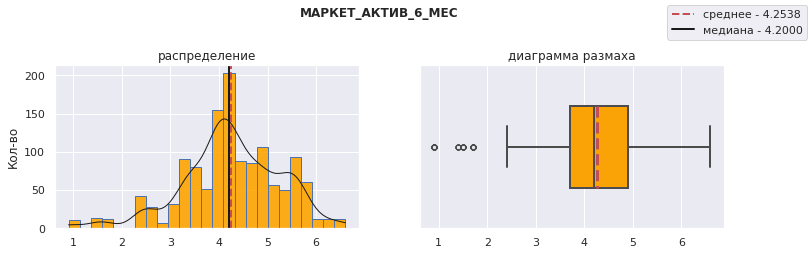

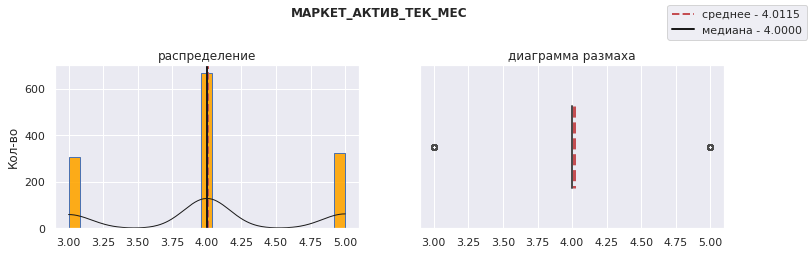

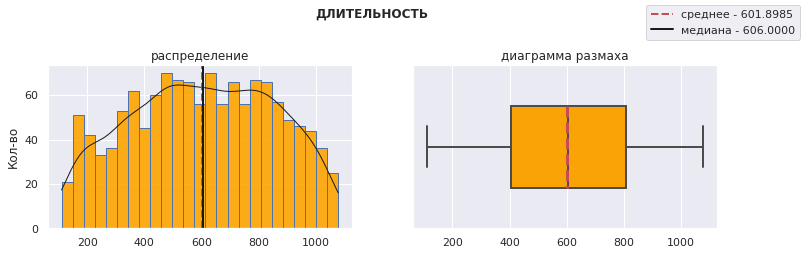

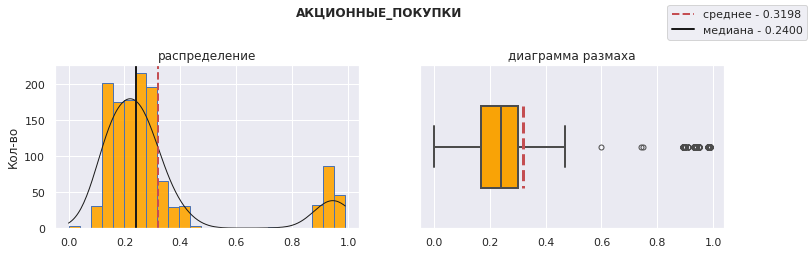

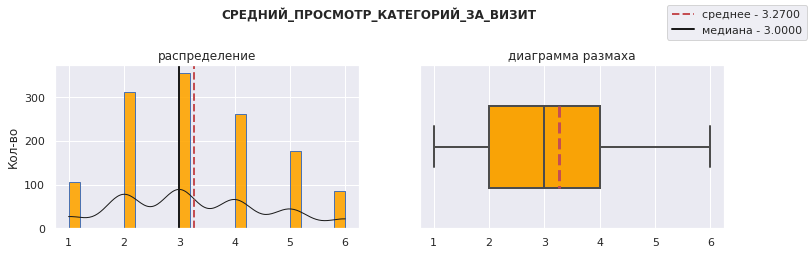

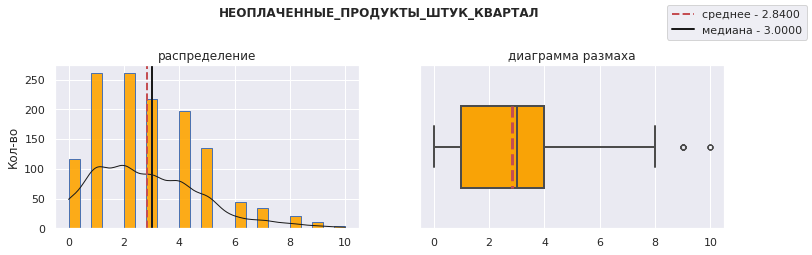

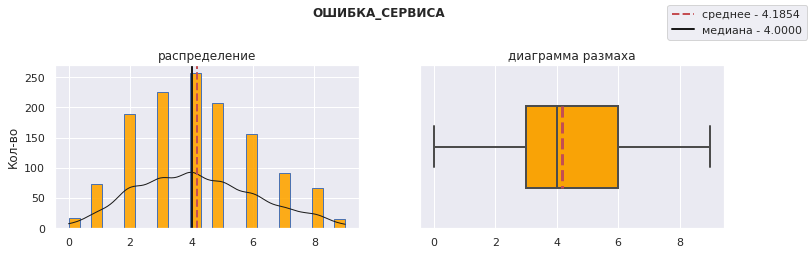

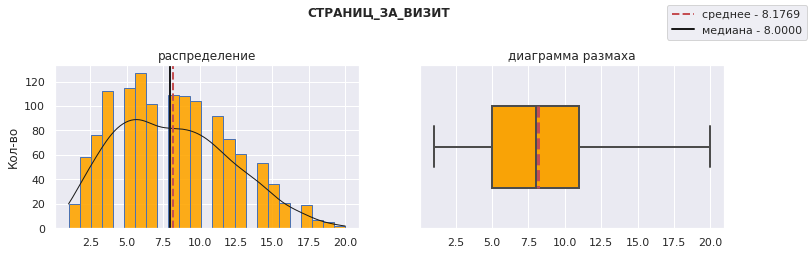

In [17]:
num_col = market_file_data.drop(columns='id').select_dtypes('number').columns
for i in num_col:
    graph_num_plot(market_file_data, i)

- среднемесячное значение маркетинговых коммуникаций компании <b>маркет_актив_6_мес</b>, которое приходилось на покупателя за последние 6 месяцев равняется 4.25, медиана немного меньше и равняетя 4.2. Есть несколько выбросов - около 1 коммуникация за 6 месяцев.
- срежнее количество взаимодействий за последний месяц <b>"маркет_актив_тек_мес"</b> равняется 4. Почти в два раза меньшее количество взаимодействий наблюдается для значений "3" и "5" взаимодействий.
- среднее значение дней прошедших с момента регистрации покупателя на сайте составляет 602, медиана немного больше 606.
- среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев (<b>"акционные_покупки"</b>) составляет 0.32, медиана 0.24. Так же много пользователей, у которых доля покупок по акции составляет 0.9.
- Средний_просмотр_категорий_за_визит равняется 3, немного меньше пользователей, которые просматривают по 2 и 4 категории за один визит. 
- больше всего пользователей у которых количество неоплаченных товаров в корзине равняется 1 и 2.
- среднее значение количества ошибок сервиса, признак <b>"ошибка_сервиса"</b> равняется 4.2.
- среднее значение количества страниц за визит <b>"страниц_за_визит"</b> равняется 8.2, медиана 8.

Посмотрим на категориальные признаки, так же сделаем отдельную функцию для построения.

In [18]:
def graph_cat_single_plot(df, fech, ax, ori='v'):
    
    if ori == 'v':
        axx = sns.countplot(data=df,
                                x=fech, 
                                order=df[fech].value_counts(dropna=False).index, 
                                saturation = 0.85,
                                # palette=pal,
                                color='orange',
                                width=0.5,
                                orient='v',
                                edgecolor='b', 
                                linewidth=1,
                                ax=ax
                             )
        l = len(axx.patches)
        for n, p in enumerate(axx.patches):
            percentage = f'{p.get_height():,.0f}'
            width, height = p.get_width(),p.get_height()
            x=p.get_x()+width/2-0.1*((n+1)**0.7)
            y=p.get_y()+height+0.05*height
            ax.annotate(percentage,(x,y), fontsize=12, fontweight="bold")


        ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=0)
        ax.set_ylim(0,df[fech].value_counts().values.max()*1.20)
        # ax.set_title(f'Корреляция целевого признака')
        ax.set_xlabel('категория', fontsize=12, fontweight="bold")
        ax.set_ylabel('кол-во', fontsize=12, fontweight="bold")
        ax.set_title(fech.upper(), fontsize=12, fontweight="bold")
        
        
    else:
        axx = sns.countplot(data=df,
                        y=fech, 
                        order=df[fech].value_counts(dropna=False).index, 
                        saturation = 0.85,
                        # palette=pal,
                        color='orange',
                        width=0.5,
                        edgecolor='b', 
                        linewidth=1,
                        ax=ax
                     )
        l = len(axx.patches)
        for n, p in enumerate(axx.patches):
            percentage = f'{p.get_width():,.0f}'
            width, height = p.get_width(),p.get_height()
            x=p.get_x()+width +0.05* width
            y=p.get_y()+height-0.1*((n+1)**0.1)
            ax.annotate(percentage,(x,y), fontsize=12, fontweight="bold")


        ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=35)
        ax.set_xlim(0,df[fech].value_counts().values.max()*1.20)
        # ax.set_title(f'Корреляция целевого признака')
        ax.set_ylabel('категория', fontsize=12, fontweight="bold")
        ax.set_xlabel('кол-во', fontsize=12, fontweight="bold")
        ax.set_title(fech.upper(), fontsize=12, fontweight="bold")


def graph_cat_plot(df, feature, ori):
    fig, ax = plt.subplots(1,len(feature),figsize=(3*len(feature), 3))
    # pal = sns.color_palette("Oranges", len(df))
    sns.set_color_codes("muted")
    fig.tight_layout(pad=2)
    for n, fech in enumerate(feature):
        graph_cat_single_plot(df, fech, ax[n], ori)
    fig.suptitle('Категориальные признаки'.upper(), fontname="Comic Sans MS", fontsize=15, fontweight="bold", y=1.15);

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


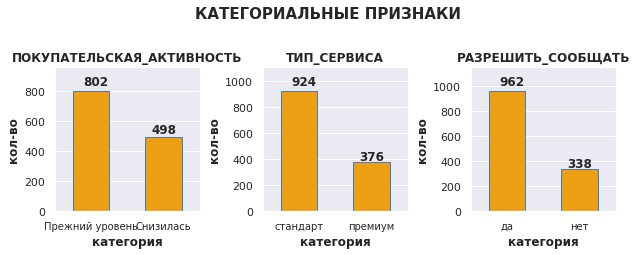

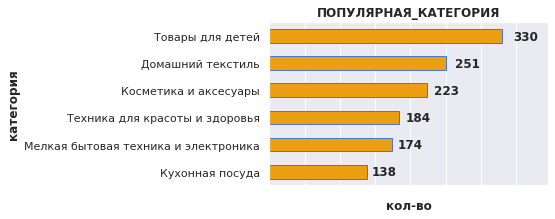

In [19]:
cat_col = market_file_data.select_dtypes('object').drop('популярная_категория', axis=1).columns
graph_cat_plot(market_file_data, cat_col, 'v')
fig, ax=plt.subplots(figsize=(5, 3))
graph_cat_single_plot(market_file_data, 'популярная_категория', ax, 'h')

- в признаке "покупательская_активность" активность большинства пользователей осталось на прежнем уровне 802, для 498 пользователей активность снизилась.
- признак "тип_сервиса" - большинство покупателей пользуются стандартной подпиской (924 пользоваетеля), премиальной подпиской пользуются 376 пользователя.
- признак "разрешить_сообщать" - большинство пользователей разрешают присылать дополнительные предложения о товаре (962 пользователя), остальная часть, 338 пользователей, свое согласие не дали.
- в признаке "популярная_категория" представлено 6 категорий. Наибольшим спросом пользуется кактегория "товары для детей" (330 пользователя). Потом идут категории "домашний текстиль" (251 пользователь) и "косметика и аксесуары" (223 пользователя). Наименьшим спросом пользуется категория "кухонная посуда" (138 пользователей).

##### Датасет <b>market_money_data</b>

Посмотрим на статистику датасета, при этом выделим разные периоды.

In [20]:
market_money_data.groupby('период')['выручка'].describe().T

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
count,1_300.00,1_300.00,1_300.00
mean,4_936.92,4_825.21,5_314.96
std,739.60,405.98,2_939.71
min,0.00,0.00,2_758.70
25%,4_496.75,4_583.00,4_706.05
50%,5_005.00,4_809.00,5_179.95
75%,5_405.62,5_053.50,5_761.73
max,6_869.50,5_663.00,106_862.20


Есть подозрительное максимальное значние 107т. для категории текущий месяц. Посмотри на пользователя и его траты по предыдущим месяцам.

In [21]:
max_val = market_money_data['выручка'].max()
display(market_money_data.query('выручка == @max_val'))
market_money_data.query('id == 215380')

,id,период,выручка
98,215380,текущий_месяц,106_862.20


,id,период,выручка
96,215380,препредыдущий_месяц,5_051.00
97,215380,предыдущий_месяц,6_077.00
98,215380,текущий_месяц,106_862.20


Данное значение является ошибкой. За предыдущие месяцы пользователь совершил покупки на 5т и 6т, т.е. 20% рост. Такое ощущение, что первые две цифры введены ошибочно и настоящее значение должно быть 6862. Исправим.

In [22]:
market_money_data.loc[market_money_data['выручка'] == max_val, 'выручка'] = 6862
market_money_data.groupby('период')['выручка'].describe().T

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
count,1_300.00,1_300.00,1_300.00
mean,4_936.92,4_825.21,5_238.04
std,739.60,405.98,836.37
min,0.00,0.00,2_758.70
25%,4_496.75,4_583.00,4_706.05
50%,5_005.00,4_809.00,5_179.95
75%,5_405.62,5_053.50,5_761.73
max,6_869.50,5_663.00,7_799.40


Посмотрим распределения выручки по периодам.

препредыдущий_месяц


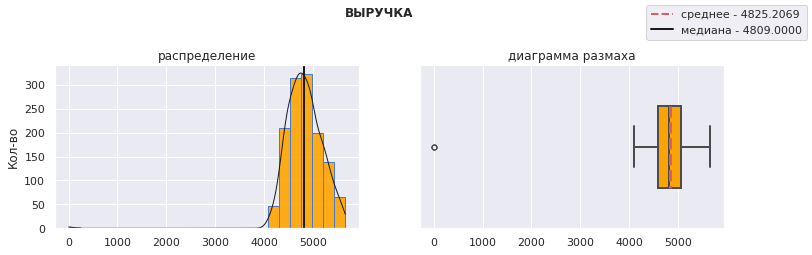

предыдущий_месяц


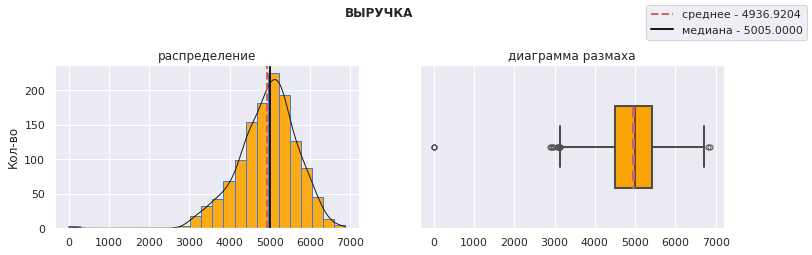

текущий_месяц


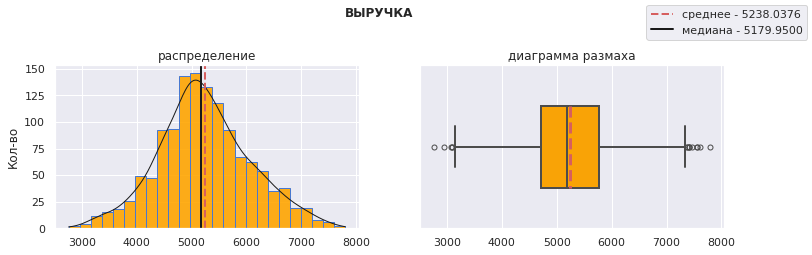

In [23]:
for i in sorted(market_money_data['период'].unique().tolist(), key=len, reverse=True):
    print(i)
    graph_num_plot(market_money_data.query('период == @i'), 'выручка')

Аномальных значений не видно. По графикам видно, что среднее значение выручки увеличивается. Медиана для всех периодов не сильно отличается от среднего.

##### Датасет <b>market_time_data</b>

In [24]:
market_time_data.groupby('период')['минут'].describe().T

период,предыдущий_месяц,текущий_месяц
count,1_300.00,1_300.00
mean,13.47,13.20
std,3.93,4.22
min,5.00,4.00
25%,11.00,10.00
50%,13.00,13.00
75%,17.00,16.00
max,23.00,23.00


предыдущий_месяц


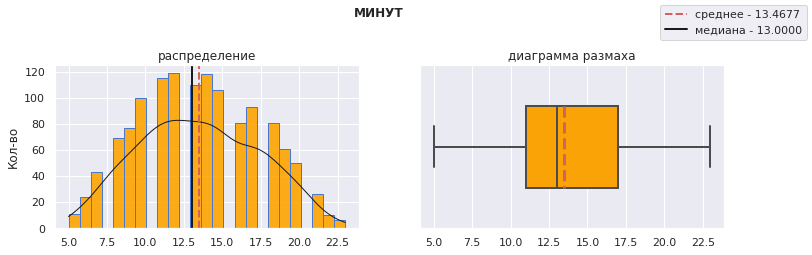

текущий_месяц


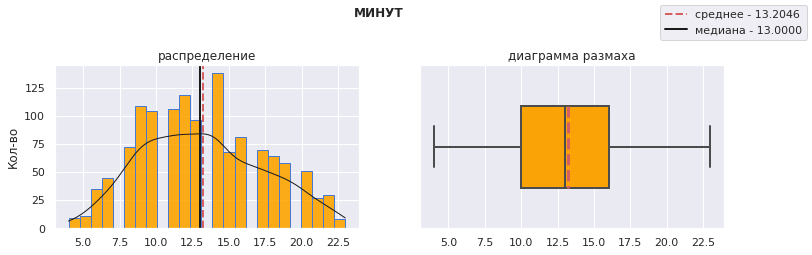

In [25]:
for i in sorted(market_time_data['период'].unique().tolist(), key=len, reverse=True):
    print(i)
    graph_num_plot(market_time_data.query('период == @i'), 'минут')

Аномальных значений не видно. Среднее немного уменьшилось и с 13.4 стало 13.2. Медианное значение не поменялось.

##### Датасет <b>money_data</b>

In [26]:
money_data[['прибыль']].describe()

,прибыль
count,1_300.00
mean,4.00
std,1.01
min,0.86
25%,3.30
50%,4.04
75%,4.67
max,7.43


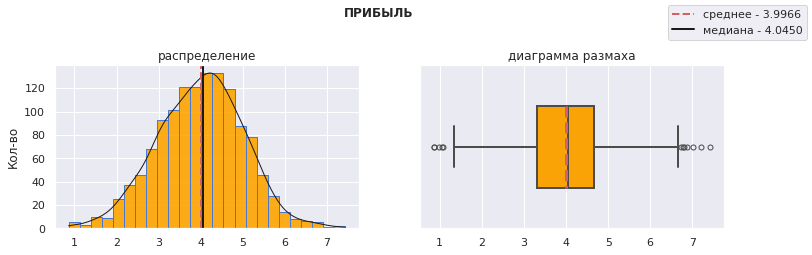

In [27]:
graph_num_plot(money_data, 'прибыль')

Среднее и медиана очень близки. Среднее значение признака составляет 3.9966, медианна - 4.0450. Распределение имеет несимметричный вид, заметна скошенность влево, $\overline{x} < M_{e}$.

<a id='section_3_2'></a>

#### 3.2. Отбор пользователей

Отберем клиентов с покупательской активностью не менее трёх месяцев

In [28]:
dff = pd.pivot_table(market_money_data,
               index='id',
               values='выручка',
               columns='период',
            ).applymap(lambda x: 1 if x>0 else 0).all(axis=1)
idx_dff = dff[dff].index
idx_dff

Int64Index([215349, 215350, 215351, 215352, 215353, 215354, 215355, 215356,
            215358, 215360,
            ...
            216638, 216639, 216640, 216641, 216642, 216643, 216644, 216645,
            216646, 216647],
           dtype='int64', name='id', length=1297)

Отберем клиентов на основе полученных индексов

In [29]:
market_money_data.set_index('id').loc[idx_dff].head()

,период,выручка
id,,
215349,препредыдущий_месяц,4_472.00
215349,текущий_месяц,4_971.60
215349,предыдущий_месяц,5_216.00
215350,препредыдущий_месяц,4_826.00
215350,текущий_месяц,5_058.40


Вы получили список клиентов, которые совершали покупки в течении 3х месяцев. Всего таких клиентов оказалось 1297, что составляет 99.8% от общего числа.

<a id='section_3_3'></a>

#### 3.3. Промежуточный вывод

В датасете <b>market_file_data</b>
- среднемесячное значение маркетинговых коммуникаций компании <b>маркет_актив_6_мес</b>, которое приходилось на покупателя за последние 6 месяцев равняется 4.25, медиана немного меньше и равняетя 4.2. Есть несколько выбросов - около 1 коммуникация за 6 месяцев.
- срежнее количество взаимодействий за последний месяц <b>"маркет_актив_тек_мес"</b> равняется 4. Почти в два раза меньшее количество взаимодействий наблюдается для значений "3" и "5" взаимодействий.
- среднее значение дней прошедших с момента регистрации покупателя на сайте составляет 602, медиана немного больше 606.
- среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев (<b>"акционные_покупки"</b>) составляет 0.32, медиана 0.24. Так же много пользователей, у которых доля покупок по акции составляет 0.9.
- Средний_просмотр_категорий_за_визит равняется 3, немного меньше пользователей, которые просматривают по 2 и 4 категории за один визит. 
- больше всего пользователей у которых количество неоплаченных товаров в корзине равняется 1 и 2.
- среднее значение количества ошибок сервиса, признак <b>"ошибка_сервиса"</b> равняется 4.2.
- среднее значение количества страниц за визит <b>"страниц_за_визит"</b> равняется 8.2, медиана 8.- среднемесячное значение маркетинговых коммуникаций компании <b>маркет_актив_6_мес</b>, которое приходилось на покупателя за последние 6 месяцев равняется 4.25, медиана немного меньше и равняетя 4.2. Есть несколько выбросов - около 1 коммуникация за 6 месяцев.
- срежнее количество взаимодействий за последний месяц <b>"маркет_актив_тек_мес"</b> равняется 4. Почти в два раза меньшее количество взаимодействий наблюдается для значений "3" и "5" взаимодействий.
- среднее значение дней прошедших с момента регистрации покупателя на сайте составляет 602, медиана немного больше 606.
- среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев (<b>"акционные_покупки"</b>) составляет 0.32, медиана 0.24. Так же много пользователей, у которых доля покупок по акции составляет 0.9.
- Средний_просмотр_категорий_за_визит равняется 3, немного меньше пользователей, которые просматривают по 2 и 4 категории за один визит. 
- больше всего пользователей у которых количество неоплаченных товаров в корзине равняется 1 и 2.
- среднее значение количества ошибок сервиса, признак <b>"ошибка_сервиса"</b> равняется 4.2.
- среднее значение количества страниц за визит <b>"страниц_за_визит"</b> равняется 8.2, медиана 8.

- в признаке "покупательская_активность" активность большинства пользователей осталось на прежнем уровне 802, для 498 пользователей активность снизилась.
- признак "тип_сервиса" - большинство покупателей пользуются стандартной подпиской (924 пользоваетеля), премиальной подпиской пользуются 376 пользователя.
- признак "разрешить_сообщать" - большинство пользователей разрешают присылать дополнительные предложения о товаре (962 пользователя), остальная часть, 338 пользователей, свое согласие не дали.
- в признаке "популярная_категория" представлено 6 категорий. Наибольшим спросом пользуется кактегория "товары для детей" (330 пользователя). Потом идут категории "домашний текстиль" (251 пользователь) и "косметика и аксесуары" (223 пользователя). Наименьшим спросом пользуется категория "кухонная посуда" (138 пользователей).- в признаке "покупательская_активность" активность большинства пользователей осталось на прежнем уровне 802, для 498 пользователей активность снизилась.
- признак "тип_сервиса" - большинство покупателей пользуются стандартной подпиской (924 пользоваетеля), премиальной подпиской пользуются 376 пользователя.
- признак "разрешить_сообщать" - большинство пользователей разрешают присылать дополнительные предложения о товаре (962 пользователя), остальная часть, 338 пользователей, свое согласие не дали.
- в признаке "популярная_категория" представлено 6 категорий. Наибольшим спросом пользуется кактегория "товары для детей" (330 пользователя). Потом идут категории "домашний текстиль" (251 пользователь) и "косметика и аксесуары" (223 пользователя). Наименьшим спросом пользуется категория "кухонная посуда" (138 пользователей).

В датасете <b>market_money_data</b> аномальных значений не видно. По графикам видно, что среднее значение выручки увеличивается. Медиана для всех периодов не сильно отличается от среднего.Аномальных значений не видно. По графикам видно, что среднее значение выручки увеличивается. Медиана для всех периодов не сильно отличается от среднего.

В датасете <b>market_time_data</b> аномальных значений не видно. Среднее немного уменьшилось и с 13.4 стало 13.2. Медианное значение не поменялось.Аномальных значений не видно. Среднее немного уменьшилось и с 13.4 стало 13.2. Медианное значение не поменялось.

В датасете <b>money_data</b> среднее и медиана очень близки. Среднее значение признака составляет 3.9966, медианна - 4.0450. Распределение имеет несимметричный вид, заметна скошенность влево, $\overline{x} < M_{e}$.Среднее и медиана очень близки. Среднее значение признака составляет 3.9966, медианна - 4.0450. Распределение имеет несимметричный вид, заметна скошенность влево, $\overline{x} < M_{e}$.

<a id='section_4'></a>

### 4. Формирование общего датасета

Сформируем общий датасет из <b>market_file_data, market_money_data, market_time_data</b>. Учтем, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода.

<a id='section_4_1'></a>

#### 4.1. Создание датасета

Сформируем две отдельные сводные таблицы признаков на основе <b>market_time_data</b> и <b>market_money_data</b> и потом объединим их с <b>market_file_data</b> по "id" пользователя. После этого проверим размерность, что все правильно.

In [30]:
market_time_data_transform = pd.pivot_table(market_time_data,
                                            index='id',
                                            values='минут',
                                            columns='период'
                                           ).add_suffix('_мин')
market_money_data_transform = pd.pivot_table(market_money_data,
                                             index='id',
                                             values='выручка',
                                             columns='период',
                                            ).add_suffix('_выручка')

In [31]:
result_data = market_file_data.set_index('id').loc[idx_dff].\
                merge(market_money_data_transform, on='id').\
                merge(market_time_data_transform, on='id').\
                reset_index()
display(result_data.head())
result_data.shape

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_мин,текущий_месяц_мин
0,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5,5_216.00,4_472.00,4_971.60,12,10
1,215350,Снизилась,стандарт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5,5_457.50,4_826.00,5_058.40,8,13
2,215351,Снизилась,стандарт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4,6_158.00,4_793.00,6_610.40,11,13
3,215352,Снизилась,стандарт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2,5_807.50,4_594.00,5_872.50,8,11
4,215353,Снизилась,стандарт,да,3.30,4,762,0.26,Домашний текстиль,4,1,1,4,4_738.50,5_124.00,5_388.50,10,10


(1297, 18)

Количество строк равняется соответствует количеству активных пользователей и равняется 1297, количество столбцов равняется 18..

<a id='section_4_2'></a>

#### 4.2. Промежуточный вывод

На основе датасетов <b>market_file_data, market_money_data, market_time_data</b> сформирован общий датасет. При создании датасета созданы отдельные столбцы признаков о выручке и времени для каждого периода. Размер получившегося датасета равняется 1297 строк и 18 столбцов.

<a id='section_5'></a>

### 5. Корреляционный анализ

Изучим взаимосвязь между признаками. Рассчитаем коэффициенты корреляции между всеми признаками.

<a id='section_5_1'></a>

#### 5.1. Взаимосвязь между признаками

Рассчитаем коэффициент корреляции между признаками и построим тепловую карту. Так как у нас присутствуют категориальные признаки воспользуемся функцией phik_matrix.

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка', 'предыдущий_месяц_мин', 'текущий_месяц_мин']


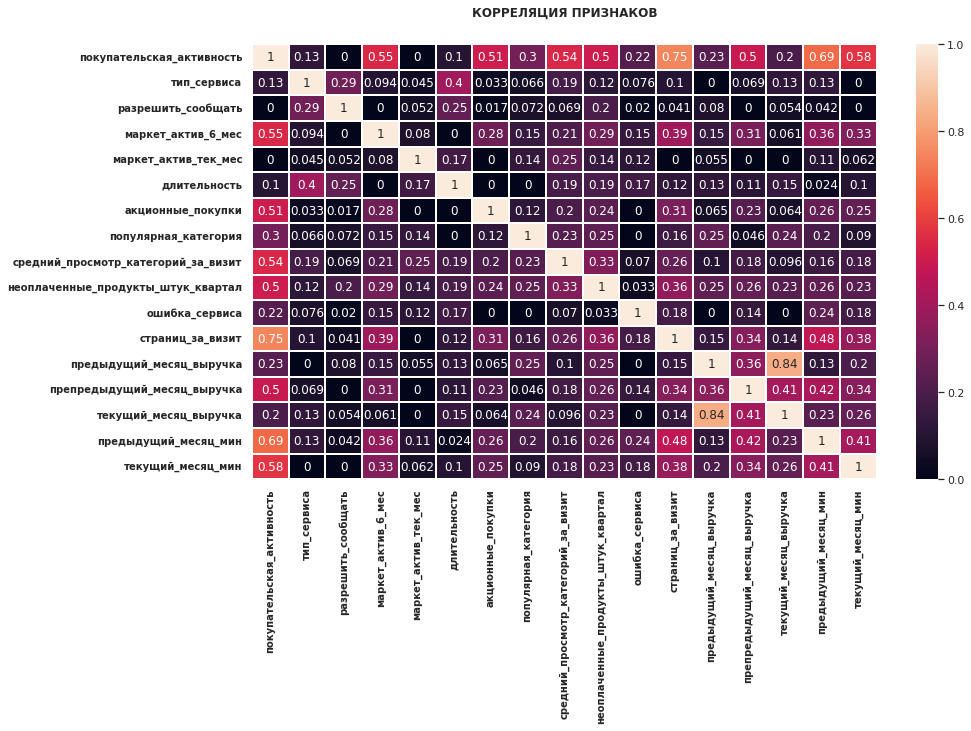

In [32]:
plt.figure(figsize=(14, 8))
ax=sns.heatmap(result_data.drop('id', axis=1).phik_matrix(), 
            annot = True, 
            vmin=0, 
            vmax=1, 
            cmap= 'rocket', 
            linewidths=0.1, 
            linecolor='white', 
            cbar_kws= {'orientation': 'vertical'});

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, fontweight="bold", rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, fontweight="bold")
ax.set_title('Корреляция признаков'.upper(), fontname="Comic Sans MS", fontsize=12, fontweight="bold", y=1.05);

Видны следующие закономерности:
- Наблюдается высокая связь по шкале Чеддока между признаками <b>"препредыдущий_месяц_выручка"</b> и <b>"акционные_покупки"</b> (кор-я = 0.75).
- Наблюдается высокая связь по шкале Чеддока между признаками <b>"препредыдущий_месяц_выручка"</b> и <b>"предыдущий_месяц_выручка"</b> (кор-я = 0.73).
- Наблюдается высокая связь по шкале Чеддока между признаками <b>"предыдущий_месяц_выручка"</b> и <b>"текущий_месяц_выручка"</b> (кор-я = 0.7).
- Наблюдается заметная теснота связи по шкале Чеддока между признаками <b>"предыдущий_месяц_выручка"</b> и <b>"акционные_покупки"</b> (кор-я = 0.64).

<br>В остальных случаях корреляция маленькая и не превышает 0.4.

Отдельно выведем столбец корреляции только для целевого признака и посмотрим с кем он коррелирует. Для этого сделаем отельную функцию построения, которая нам потом пригодиться.

In [33]:
def bar_plor_func(dataset, xlim, title_name):
    
    m = pd.DataFrame(zip(dataset.index, dataset.values), columns=['признак','значение']).sort_values('значение', ascending=False)
    fig, ax = plt.subplots(figsize=(8, 5))
    pal = sns.color_palette("Oranges_r", len(dataset))
    # sns.set_color_codes("muted")
    axx = sns.barplot(data=m, 
                      y='признак', 
                      x='значение', 
                      saturation = 0.9,
                      palette=pal
                      # width=0.75,

                     )
    for p in axx.patches:
        percentage = f'{p.get_width():,.3f}'
        width, height = p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2+0.1
        ax.annotate(percentage,(x,y), fontsize=11, fontweight="bold")
    ax.set_xlim(xlim[0], xlim[1])
    # ax.set_title(f'Корреляция целевого признака')
    ax.set_xlabel('Коэф. корреляции', fontsize=12, fontweight="bold")
    ax.set_ylabel('Признак', fontsize=12, fontweight="bold")
    ax.lines[0].set_color('k')
    fig.suptitle(title_name.upper(), fontname="Comic Sans MS", fontsize=12, fontweight="bold");

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка', 'предыдущий_месяц_мин', 'текущий_месяц_мин']


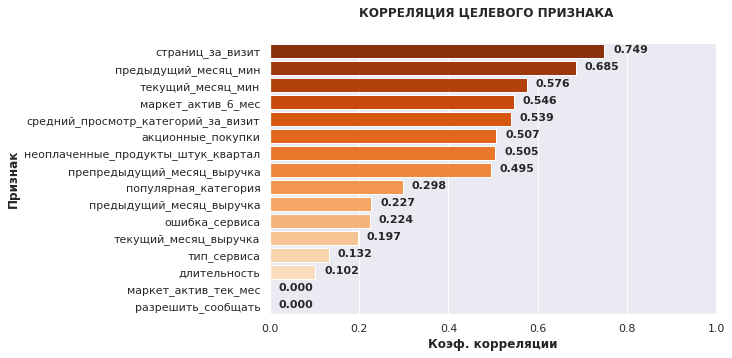

In [34]:
# dff = result_data.drop(['id','покупательская_активность'], axis=1).\
# corrwith(result_data['покупательская_активность'])
# bar_plor_func(dff, (0,1), 'Корреляция целевого признака')
dff = result_data.drop('id', axis=1).phik_matrix()['покупательская_активность'].sort_values(ascending=False)[1:]
bar_plor_func(dff, (0,1), 'Корреляция целевого признака')

По полученной таблице видна зависимость целевого признак c признаками:
- высокая связь по шкале Чеддока с признаком <b>"страниц за визит"</b>, кор-я 0.75
- средняя теснота связи по шкале Чеддока с признаком <b>"предыдущий_месяц_мин"</b>, кор-я 0.68
- средняя теснота связи по шкале Чеддока с признаком <b>"текущий_месяц_мин"</b>, кор-я 0.58
- средняя теснота связи по шкале Чеддока с признаком <b>"маркет_актив_6_мес"</b>, кор-я 0.55
- средняя теснота связи по шкале Чеддока с признаком <b>"средний_просмотр_категорий_за_визит"</b>, кор-я 0.53
- средняя теснота связи по шкале Чеддока с признаком <b>"неоплаченные_продукты_штук_за_квартал"</b>, кор-я 0.5
- слабая теснота связи по шкале Чеддока с признаком <b>"акционные_покупки"</b>, кор-я 0.5
- слабая теснота связи по шкале Чеддока с признаком <b>"препредыдущий_месяц_выручка"</b>, кор-я 0.48

Для остальных признаков наблюдается очень слабая теснота связи.

<a id='section_5_2'></a>

#### 5.2. Промежуточный вывод

Видны зависимости между некоторыми признаками, при этом максимальный коэффициент корреляции не превышает 0.75. Видны следующие закономерности:
- Корреляция между признаками <b>"препредыдущий_месяц_выручка"</b> и <b>"акционные_покупки"</b> равняется 0.75 (высокая связь по шкале Чеддока).
-  Корреляция между признаками <b>"препредыдущий_месяц_выручка"</b> и <b>"предыдущий_месяц_выручка"</b> равняется 0.73 (высокая связь по шкале Чеддока).
- Корреляция между признаками <b>"предыдущий_месяц_выручка"</b> и <b>"текущий_месяц_выручка"</b> равняется 0.7 (высокая связь по шкале Чеддока).
- Корреляция между признаками <b>"предыдущий_месяц_выручка"</b> и <b>"акционные_покупки"</b> равняется 0.64 (заметная теснота связи по шкале Чеддока).

В остальных случаях корреляция между признаками маленькая и не превышает 0.4.

Целевого признак связан c признаками:
- <b>"страниц за визит"</b>, кор-я 0.75 (высокая связь по шкале Чеддока с признаком )
- <b>"предыдущий_месяц_мин"</b>, кор-я 0.68 (средняя теснота связи по шкале Чеддока с признаком)
- <b>"текущий_месяц_мин"</b>, кор-я 0.58 (средняя теснота связи по шкале Чеддока с признаком)
- <b>"маркет_актив_6_мес"</b>, кор-я 0.55 (средняя теснота связи по шкале Чеддока с признаком)
- <b>"средний_просмотр_категорий_за_визит"</b>, кор-я 0.53 (средняя теснота связи по шкале Чеддока с признаком)
- <b>"неоплаченные_продукты_штук_за_квартал"</b>, кор-я 0.5 (средняя теснота связи по шкале Чеддока с признаком)
- <b>"акционные_покупки"</b>, кор-я 0.5 (слабая теснота связи по шкале Чеддока с признаком)
- <b>"препредыдущий_месяц_выручка"</b>, кор-я 0.48 (слабая теснота связи по шкале Чеддока с признаком)

Для остальных признаков наблюдается очень слабая теснота связи с целевым признаком. 
На сонове полученных значений связи целевого признака, при обучении модели, можно отобрать именно признаки с большим значением тесноты связи и посмотреть как поменяется значение метрики.

<a id='section_6'></a>

### 6. Построение моделей

Вторым важным требованием заказчика является критерий - молоко должно быть вкусным.
Для этого мы обучим модель логистической регрессии. 

<a id='section_6_1'></a>

#### 6.1. Обработка данных

Разделим датасет на тренировочную и тестовую выборку. При разбиении укажем стратификацию  по целевому признаку.

In [35]:
result_data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_мин,текущий_месяц_мин
0,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5,5_216.00,4_472.00,4_971.60,12,10
1,215350,Снизилась,стандарт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5,5_457.50,4_826.00,5_058.40,8,13
2,215351,Снизилась,стандарт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4,6_158.00,4_793.00,6_610.40,11,13
3,215352,Снизилась,стандарт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2,5_807.50,4_594.00,5_872.50,8,11
4,215353,Снизилась,стандарт,да,3.30,4,762,0.26,Домашний текстиль,4,1,1,4,4_738.50,5_124.00,5_388.50,10,10


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    result_data.drop(
        [
            'id',
            'покупательская_активность',
        ], 
        axis=1
    ),
    result_data['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = result_data['покупательская_активность']
)

Создаим пайплайн

In [37]:
ohe_columns = [
    'разрешить_сообщать', 'популярная_категория'
]

ord_columns = [
    'тип_сервиса'
]

num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес',
              'длительность', 'акционные_покупки',
              'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
              'ошибка_сервиса', 'страниц_за_визит',
              'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка',
              'текущий_месяц_выручка', 'предыдущий_месяц_мин',
              'текущий_месяц_мин']



# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
        )
    ]
)

ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создайте итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

Зададим модели с учетом гиперпараметром

In [38]:
param_distributions = [
    # словарь для модели KNeighborsClassifier() 
    {
        # название модели
        'models': [KNeighborsClassifier()],
        # указываем гиперпараметр модели n_neighbors
        'models__n_neighbors': range(2, 15),
        # указываем список методов масштабирования
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    },
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
#     {
#         'models': [SVC(probability=True, random_state=RANDOM_STATE)],
#         'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    
#     },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
] 

Закодируем целевой признак

In [39]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

<a id='section_6_2'></a>

#### 6.2. Обучение моделей

Создадим класс для автоматизированного поиска гиперпараметров. Так как перебираем не так много гиперпараметров воспользуемся GridSearchCV. В качетсве метрики будем использовать roc_auc. Данная метрика позволит нам просомтреть динамику качества классификации при разных заданных порогах. Это потребуется нам в дальнейшем при задании порога предстазываемой модели. Так метрика позволяет работать при дисбалансе классов.

In [40]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid=param_distributions,
    cv=5,
    scoring='roc_auc', 
    n_jobs=-1
)

In [41]:
grid_search.fit(X_train, y_train);

In [42]:
pd.options.display.float_format = '{:_.10f}'.format
result = pd.DataFrame(grid_search.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')[:5])

,rank_test_score,param_models,mean_test_score,params
208,1,"SVC(probability=True, random_state=42)",0.9148456531,"{'models': SVC(probability=True, random_state=..."
209,2,"SVC(probability=True, random_state=42)",0.9010606780,"{'models': SVC(probability=True, random_state=..."
8,3,KNeighborsClassifier(),0.8996302472,"{'models': KNeighborsClassifier(), 'models__n_..."
10,4,KNeighborsClassifier(),0.8992456519,"{'models': KNeighborsClassifier(), 'models__n_..."
212,5,"LogisticRegression(penalty='l1', random_state=...",0.8990543568,"{'models': LogisticRegression(penalty='l1', ra..."


In [43]:
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
# y_test_pred = grid_search.predict(X_test)
# print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

y_test_pred = grid_search.predict_proba(X_test)[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, y_test_pred))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                        

Лучшей значнения на тестовой выборке показала модель SVC со стандартными параметрами, <b>значение на тестовой выборке 0.906</b>. На втором и трерьем местах идут SVC и KNeighborsClassifier.

<a id='section_6_3'></a>

#### 6.3. Дообучение лучшей модели

Лучшей моделью оказалась SVC. Попробуем расширить список гиперпараметров для SVC и снова сделаем перебор.

In [44]:
param_distributions_svc = [ 
    # словарь для модели SVC()
    {
        'models': [SVC(probability=True, random_state=RANDOM_STATE)],
        'models__C':np.arange(1,10,1),
        'models__degree':np.arange(1,4),
        'models__coef0':np.arange(0.0001,0.001,0.05),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    
    },
        {
        'models': [SVC(probability=True, kernel='poly', random_state=RANDOM_STATE)],
        'models__C':np.arange(1,10,1),
        'models__degree':np.arange(1,4),
        'models__coef0':np.arange(0.0001,0.001,0.05),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    
    },
    {
        'models': [SVC(probability=True, kernel='sigmoid', random_state=RANDOM_STATE)],
        'models__C':np.arange(1,10,1),
        'models__degree':np.arange(1,4),
        'models__coef0':np.arange(0.0001,0.001,0.05),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    
    },
] 

In [45]:
grid_search_svc = GridSearchCV(
    pipe_final, 
    param_grid=param_distributions_svc,
    cv=5,
    scoring='roc_auc', 
    n_jobs=-1
)

In [46]:
grid_search_svc.fit(X_train, y_train);

In [47]:
result = pd.DataFrame(grid_search_svc.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')[:5])

,rank_test_score,param_models,mean_test_score,params
0,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9148456531,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
3,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9148456531,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
6,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9148456531,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
15,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9143110937,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
9,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9143110937,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


In [48]:
print('Лучшая модель и её параметры:\n\n', grid_search_svc.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search_svc.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
# y_test_pred_svc = grid_search_svc.predict(X_test)
# print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_svc)}')

y_test_pred_svc = grid_search_svc.predict_proba(X_test)[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, y_test_pred_svc))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                        

Значение метрики не поменялось и равно <b>0.906</b>

<a id='section_6_4'></a>

#### 6.4. Обучение лучшей модели на лучших признаках

Попробуем пойти дальше. На основе полученной матрицы корреляции признаков (п.5) отберем те, у которых корреляция не менее 0.1 и снова сделаем перебор.

In [49]:
col_new = ['маркет_актив_6_мес', 'тип_сервиса', 'популярная_категория',
        'акционные_покупки', 'средний_просмотр_категорий_за_визит', 
        'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 
        'страниц_за_визит', 'препредыдущий_месяц_выручка', 
        'предыдущий_месяц_мин', 'текущий_месяц_мин']

Воспользуемся готовым пайплайном и ему передам наши столбцы.

In [50]:
ord_columns = [
    'тип_сервиса'
]

num_columns = ['маркет_актив_6_мес',
               'акционные_покупки',
              'средний_просмотр_категорий_за_визит', 
               'неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса',
              'страниц_за_визит',
              'препредыдущий_месяц_выручка',
              'предыдущий_месяц_мин',
              'текущий_месяц_мин']

ohe_columns = [
    'тип_сервиса', 'популярная_категория'
]



# создаём общий пайплайн для подготовки данных
data_preprocessor_corr = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создайте итоговый пайплайн: подготовка данных и модель
pipe_final_corr = Pipeline(
    [
        ('preprocessor', data_preprocessor_corr),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [51]:
grid_search_svc_corr = GridSearchCV(
    pipe_final_corr, 
    param_grid=param_distributions_svc,
    cv=5,
    scoring='roc_auc', 
    n_jobs=-1
)

In [52]:
grid_search_svc_corr.fit(X_train[col_new], y_train);

In [53]:
result = pd.DataFrame(grid_search_svc_corr.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')[:5])

,rank_test_score,param_models,mean_test_score,params
0,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9133567220,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
3,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9133567220,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
6,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9133567220,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
15,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9102576874,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
9,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9102576874,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


In [54]:
print('Лучшая модель и её параметры:\n\n', grid_search_svc_corr.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search_svc_corr.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
# y_test_pred_svc = grid_search_svc_corr.predict(X_test[col_new])
# print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_svc)}')

y_test_pred_svc = grid_search_svc_corr.predict_proba(X_test[col_new])[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, y_test_pred_svc))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['тип_сервиса',
                                                   'популярная_категория']),
                                                 ('ord',
                                               

Получилось еще немного поднять метрику на тестовой, <b>значение метрики стало 0.915</b>.

<a id='section_6_5'></a>

#### 6.5. Обучение лучшей модели с перебором признаков

 Попробуем расширить наш пайплайн за счет выборки признаков. Добавим в пайплайн перебор параметров SelectKBest.

In [55]:
models = []

for i in range(len(X_test.columns)):
        # объявляем селектор 
    # он будет подбирать разное количество признаков за счёт цикла
    clf = Pipeline([
        ('preprocessor', data_preprocessor),
        ('feature_selection', SelectKBest(f_classif, k=i+1)),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))])
    
    grid_search_new = GridSearchCV(
        clf, 
        param_grid=param_distributions_svc,
        cv=5,
        scoring='roc_auc')
    
    models.append(grid_search_new)
    grid_search_new.fit(X_train, y_train);
    # y_test_pred_new = grid_search_new.predict(X_test)
    y_test_pred_new = grid_search_new.predict_proba(X_test)[:, 1]
    result = pd.DataFrame(grid_search_new.cv_results_)
    display(result[['rank_test_score', 'param_models', 'mean_test_score','params']].\
            sort_values('rank_test_score')[:5])
    # print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_new)}')
    print('Площадь ROC-кривой:', roc_auc_score(y_test, y_test_pred_new))

,rank_test_score,param_models,mean_test_score,params
19,1,"SVC(C=3, coef0=0.0001, degree=1, probability=T...",0.8235965565,"{'models': SVC(C=3, coef0=0.0001, degree=1, pr..."
26,1,"SVC(C=3, coef0=0.0001, degree=1, probability=T...",0.8235965565,"{'models': SVC(C=3, coef0=0.0001, degree=1, pr..."
25,1,"SVC(C=3, coef0=0.0001, degree=1, probability=T...",0.8235965565,"{'models': SVC(C=3, coef0=0.0001, degree=1, pr..."
24,1,"SVC(C=3, coef0=0.0001, degree=1, probability=T...",0.8235965565,"{'models': SVC(C=3, coef0=0.0001, degree=1, pr..."
23,1,"SVC(C=3, coef0=0.0001, degree=1, probability=T...",0.8235965565,"{'models': SVC(C=3, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.8316482105601029


,rank_test_score,param_models,mean_test_score,params
11,1,"SVC(C=2, coef0=0.0001, degree=1, probability=T...",0.8591016653,"{'models': SVC(C=2, coef0=0.0001, degree=1, pr..."
17,1,"SVC(C=2, coef0=0.0001, degree=1, probability=T...",0.8591016653,"{'models': SVC(C=2, coef0=0.0001, degree=1, pr..."
14,1,"SVC(C=2, coef0=0.0001, degree=1, probability=T...",0.8591016653,"{'models': SVC(C=2, coef0=0.0001, degree=1, pr..."
20,4,"SVC(C=2, coef0=0.0001, degree=1, probability=T...",0.8578453627,"{'models': SVC(C=2, coef0=0.0001, degree=1, pr..."
26,4,"SVC(C=2, coef0=0.0001, degree=1, probability=T...",0.8578453627,"{'models': SVC(C=2, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.8799350024073183


,rank_test_score,param_models,mean_test_score,params
29,1,"SVC(C=4, coef0=0.0001, degree=1, probability=T...",0.8682119376,"{'models': SVC(C=4, coef0=0.0001, degree=1, pr..."
32,1,"SVC(C=4, coef0=0.0001, degree=1, probability=T...",0.8682119376,"{'models': SVC(C=4, coef0=0.0001, degree=1, pr..."
35,1,"SVC(C=4, coef0=0.0001, degree=1, probability=T...",0.8682119376,"{'models': SVC(C=4, coef0=0.0001, degree=1, pr..."
38,4,"SVC(C=4, coef0=0.0001, degree=1, probability=T...",0.8670684883,"{'models': SVC(C=4, coef0=0.0001, degree=1, pr..."
41,4,"SVC(C=4, coef0=0.0001, degree=1, probability=T...",0.8670684883,"{'models': SVC(C=4, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.8804365270422083


,rank_test_score,param_models,mean_test_score,params
29,1,"SVC(C=4, coef0=0.0001, degree=1, probability=T...",0.8776639069,"{'models': SVC(C=4, coef0=0.0001, degree=1, pr..."
32,1,"SVC(C=4, coef0=0.0001, degree=1, probability=T...",0.8776639069,"{'models': SVC(C=4, coef0=0.0001, degree=1, pr..."
35,1,"SVC(C=4, coef0=0.0001, degree=1, probability=T...",0.8776639069,"{'models': SVC(C=4, coef0=0.0001, degree=1, pr..."
20,4,"SVC(C=4, coef0=0.0001, degree=1, probability=T...",0.8775532996,"{'models': SVC(C=4, coef0=0.0001, degree=1, pr..."
26,4,"SVC(C=4, coef0=0.0001, degree=1, probability=T...",0.8775532996,"{'models': SVC(C=4, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.8866554325148452


,rank_test_score,param_models,mean_test_score,params
1,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.8810106023,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
4,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.8810106023,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
7,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.8810106023,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
17,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.8803496265,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
14,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.8803496265,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.909484833895041


,rank_test_score,param_models,mean_test_score,params
22,1,"SVC(C=3, coef0=0.0001, degree=1, probability=T...",0.8953062691,"{'models': SVC(C=3, coef0=0.0001, degree=1, pr..."
19,1,"SVC(C=3, coef0=0.0001, degree=1, probability=T...",0.8953062691,"{'models': SVC(C=3, coef0=0.0001, degree=1, pr..."
25,1,"SVC(C=3, coef0=0.0001, degree=1, probability=T...",0.8953062691,"{'models': SVC(C=3, coef0=0.0001, degree=1, pr..."
15,4,"SVC(C=3, coef0=0.0001, degree=1, probability=T...",0.8952361204,"{'models': SVC(C=3, coef0=0.0001, degree=1, pr..."
12,4,"SVC(C=3, coef0=0.0001, degree=1, probability=T...",0.8952361204,"{'models': SVC(C=3, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.9139784946236559


,rank_test_score,param_models,mean_test_score,params
0,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9030484650,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
3,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9030484650,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
6,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9030484650,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
1,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9023037376,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
4,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9023037376,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.910086663456909


,rank_test_score,param_models,mean_test_score,params
1,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9124419726,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
4,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9124419726,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
7,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9124419726,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
0,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9113665972,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
3,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9113665972,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.9226849622853475


,rank_test_score,param_models,mean_test_score,params
0,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9138734147,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
3,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9138734147,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
6,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9138734147,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
1,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9129173951,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
4,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9129173951,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.9244102070293692


,rank_test_score,param_models,mean_test_score,params
0,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9115147172,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
3,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9115147172,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
6,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9115147172,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
78,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9112404785,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
72,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9112404785,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.9188733750601831


,rank_test_score,param_models,mean_test_score,params
0,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9117905294,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
3,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9117905294,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
6,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9117905294,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
72,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9100791477,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
75,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9100791477,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.9181110576151501


,rank_test_score,param_models,mean_test_score,params
0,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9113418385,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
3,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9113418385,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
6,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9113418385,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
9,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9087655201,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
15,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9087655201,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.9214813031616114


,rank_test_score,param_models,mean_test_score,params
0,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9129304941,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
3,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9129304941,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
6,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9129304941,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
9,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9110517311,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
12,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9110517311,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.9225645963729738


,rank_test_score,param_models,mean_test_score,params
0,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9137855632,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
3,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9137855632,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
6,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9137855632,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
15,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9111439828,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
9,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9111439828,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.9215214251324025


,rank_test_score,param_models,mean_test_score,params
0,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9174401186,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
3,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9174401186,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
6,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9174401186,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
15,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9150174323,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
9,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9150174323,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.9225645963729738


,rank_test_score,param_models,mean_test_score,params
0,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9177269228,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
3,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9177269228,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
6,1,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9177269228,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
15,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9154171370,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."
9,4,"SVC(C=1, coef0=0.0001, degree=1, probability=T...",0.9154171370,"{'models': SVC(C=1, coef0=0.0001, degree=1, pr..."


Площадь ROC-кривой: 0.920638741774996


Лучшее значение на тестовой выборке <b>0.9244</b>.

Посмотрим на сам пайплайн и какие столбцы признаков были выбраны моделью.

In [56]:
models[8].feature_names_in_

array(['тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес',
       'маркет_актив_тек_мес', 'длительность', 'акционные_покупки',
       'популярная_категория', 'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'предыдущий_месяц_выручка',
       'препредыдущий_месяц_выручка', 'текущий_месяц_выручка',
       'предыдущий_месяц_мин', 'текущий_месяц_мин'], dtype=object)

In [57]:
models[8].best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   Simp...
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'предыдущий_месяц_выручка',
                                                   'препредыдущий_месяц_выручка',
                                                   'текущий_месяц_выручка',
                                                   'предыдущий_месяц_мин',
                                                   'текущий_месяц_мин'])])),
                ('feature_selection', SelectKBest(k=9)),
                ('models',
                 SVC(C=1, coef0=0.0001, degree=1, probability=True,
                     random_state=42))])

In [58]:
X_train_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)

X_test_p = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()    
)

In [59]:
# models[9].best_estimator_['feature_selection'].get_feature_names_out()
mask = models[8].best_estimator_['feature_selection'].get_support()
best_model_col = X_train_p.columns[mask].to_list()
best_model_col

['ohe__популярная_категория_Мелкая бытовая техника и электроника',
 'num__маркет_актив_6_мес',
 'num__акционные_покупки',
 'num__средний_просмотр_категорий_за_визит',
 'num__неоплаченные_продукты_штук_квартал',
 'num__страниц_за_визит',
 'num__препредыдущий_месяц_выручка',
 'num__предыдущий_месяц_мин',
 'num__текущий_месяц_мин']

Лучшее значение метрики по тестовой выбрке  получилось для модели SVC c параметрами C=1, coef0=0.0001, degree=1, random_state=42. В качестве признаков были выбраны категориальные: 'тип_сервиса', 'популярная_категория' и числовые 'маркет_актив_тек_мес', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'препредыдущий_месяц_выручка', 'предыдущий_месяц_мин', 'текущий_месяц_мин'. Значение метрики составило 0.8852.
<br>Так же делался обход по признакам выбранным на основе корреляции. Но выше 0.8827 на тестовой выборке подняться не удалось.

<a id='section_6_6'></a>

#### 6.6. Промежуточный вывод

Был построен пайплайн и обучена модель на итоговом датасете. При выборе модели были обучены четыре модели: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и SVC. В качестве метрики была выбрана "roc_auc" так как она устойчива к неравновесным выборкам. 
- Среди рассмотренных моделей лучшиее значение получилось для SVC, значение метрики на тестовой выборке составило 0,873. 
- После расширения списка гиперпараметров удалось поднять метрику до 0.88. 
- Обучение лучшей модели на выбранных признаках по корреляции с целевым позволила поднять значение метрики до 0.882. 
- Расширение пайплайна функцией SelectKBest и автоматический подбор признаков позволил поднять значение до 0.8852. Лучшее значение метрики по тестовой выбрке  получилось для модели SVC c параметрами C=1, coef0=0.0001, degree=1, random_state=42. В качестве признаков были выбраны категориальные: 'тип_сервиса', 'популярная_категория' и числовые 'маркет_актив_тек_мес', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'препредыдущий_месяц_выручка', 'предыдущий_месяц_мин', 'текущий_месяц_мин'. Значение метрики составило 0.8857.
- Обход с использованием пайплайна с функцией SelectKBest по признакам выбранным на основе корреляции с целевым лучшего значения метрики не дал. На тестовой выборке значение равнялось 0.8827.

<a id='section_7'></a>

### 7. Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 
Посмотрим:
- какие признаки мало значимы для модели;
- какие признаки сильнее всего влияют на целевой признак;
- как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

<a id='section_7_1'></a>

#### 7.1. Оценка важности признаков

Оценим важность признаков. Оценку будем делать: 
- для нашей лучшей модели SVC, которая при обучении выбрала лучшие параметры.
- для модели SVC обученной на всех признаках.

Для оценки значимости признаков построим графики важности с помощью метода SHAP.

<a id='section_7_1_1'></a>

##### 7.1.1. SVC обученная на лучших признаках

Подготовим данные. Выберем столбцы, которые отобрала наша лучшая модель SVC.

In [60]:
# best_cat_col = [x for x in X_train_p.columns if x.split('__')[1].rsplit('_',1)[0] in best_model_col]
# best_num_col = [x for x in X_train_p.columns if x.split('__')[1] in best_model_col]
# best_col = best_cat_col + best_num_col

X_train_p = X_train_p[best_model_col]
X_test_p = X_test_p[best_model_col]

In [61]:
# model = grid_search_svc.best_estimator_['models']
best_model = models[8].best_estimator_['models']
# best_model.fit(X_train_p, y_train)
explainer = shap.Explainer(best_model.predict_proba, X_train_p[:100])

In [62]:
shap_values = explainer(X_test_p[:100])

ExactExplainer explainer: 101it [01:27,  1.09it/s]                         


Построим диаграмму shap.plots.beeswarm, для визуализации вклада признаков в каждое предсказание модели.

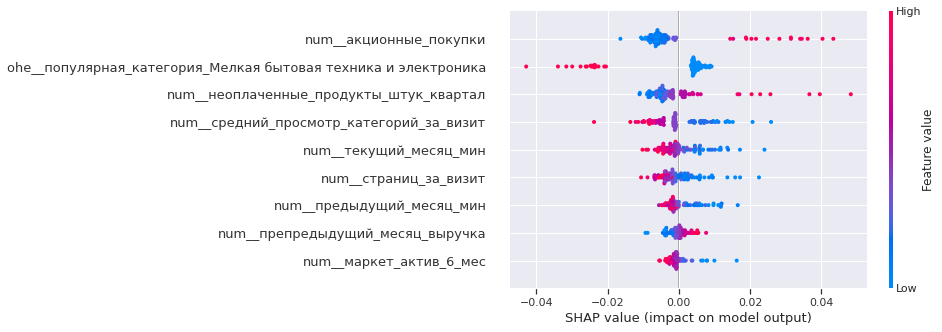

In [63]:
shap.plots.beeswarm(shap_values[:,:,1])

Чем больше значения признаков <b>страниц_за_визит, предыдущий_месяц_мин, текущий_месяц_мин, средний_просмотр_категорий_за_визит</b>, тем меньше SHAP‑значения объектов. Т.е. для данного наблюдения высокая вероятность принадлежности к классу 0.
Чем больше значение признаков <b>неоплаченные_продукты_штук_квартал</b>, тем выше SHAP-значения. Т.е. для данного наблюдения высокая вероятность принадлежности к классу 1.

Воспользуемся диаграммой shap.plots.waterfall для визуализации SHAP-значения каждого наблюдения в датасете. Визуализируем нескольких индивидуальные значений.

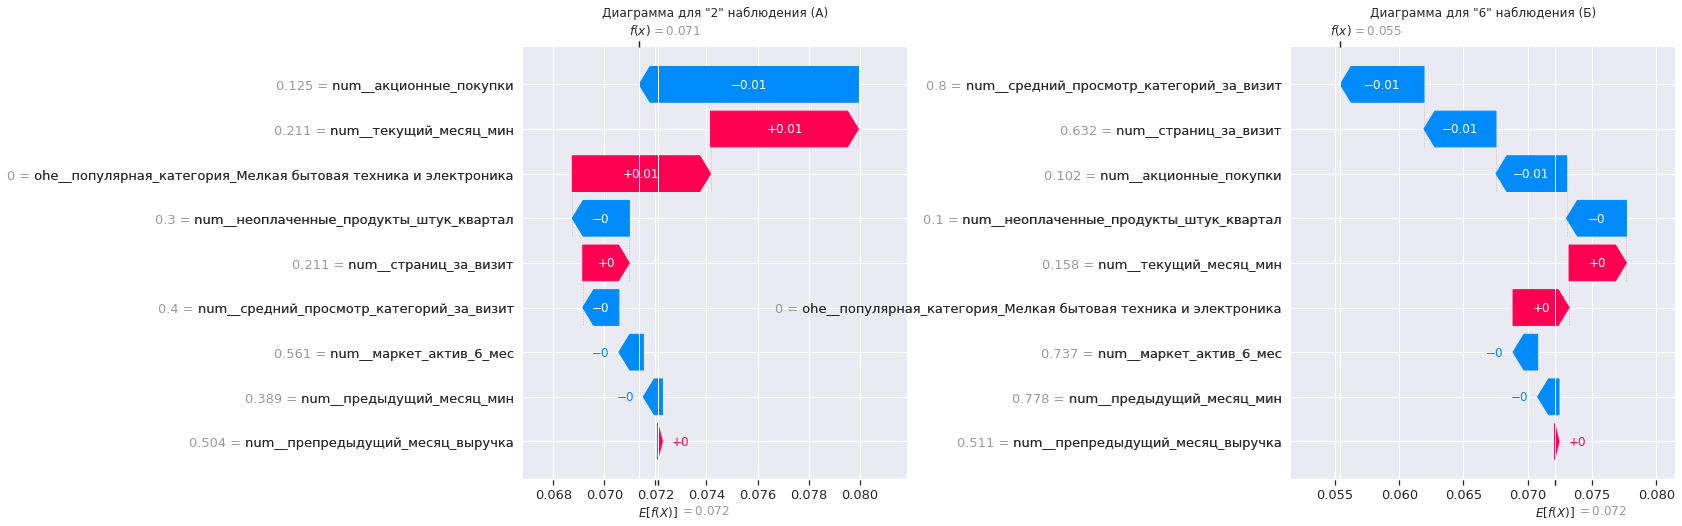

In [64]:
plt.figure()
plt.subplot(1,2,1)
plt.title(f'Диаграмма для "2" наблюдения (А)')
shap.plots.waterfall(shap_values[1,:,1], show=False) 

plt.subplot(1,2,2)
plt.title(f'Диаграмма для "6" наблюдения (Б)')
shap.plots.waterfall(shap_values[11,:,1], show=False) 


# Optional for adjusting the margins:
plt.subplots_adjust(
    left=0,
    bottom=0, 
    right=2, 
    top=1,
    wspace=1,
)
plt.show()

Наблюдение "1" - сильнее всего на классификацию наблюдения влияют признаки "неоплаченные_продукты_штук_квартал", "страниц_за_визит" и "средний_просмотр_категорий_за_визит", они «перетягивает» предсказание в сторону класса 1.

Наблюдение "5" - сильнее всего на классификацию наблюдения влияют признаки "средний_просмотр_категорий_за_визит" и "предыдущий_месяц_мин", они «перетягивает» предсказание в сторону класса 0.

<a id='section_7_1_2'></a>

##### 7.1.2. SVC обученная на лучших признаках

Проделаем тоже самое для модели обученной на всех признаках

In [65]:
X_train_p = pd.DataFrame(
    data_preprocessor.transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)

X_test_p = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()    
) 


model_svc = grid_search_svc.best_estimator_['models']
# model_svc.fit(X_train_p, y_train)
explainer_svc = shap.Explainer(model_svc.predict_proba, X_train_p[:100])

In [66]:
shap_values_scv = explainer_svc(X_test_p[:100])

PermutationExplainer explainer: 101it [01:24,  1.05it/s]                         


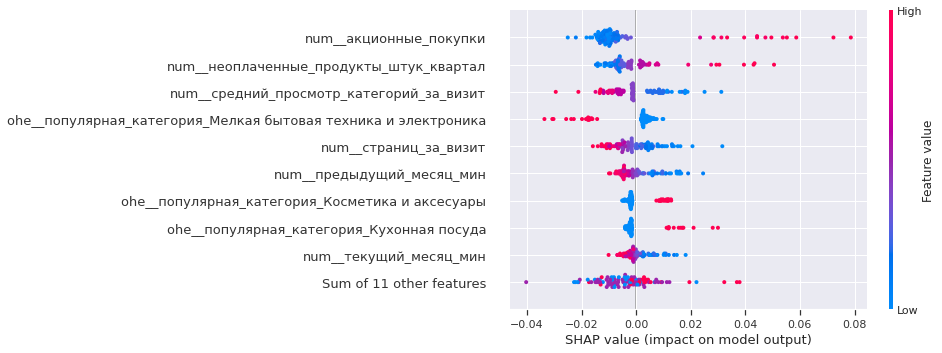

In [67]:
shap.plots.beeswarm(shap_values_scv[:,:,1])

Чем больше значения признаков <b>страниц_за_визит, предыдущий_месяц_мин, текущий_месяц_мин, средний_просмотр_категорий_за_визит, маркет_актив_6_мес</b>, тем меньше SHAP‑значения объектов. Т.е. для данного наблюдения высокая вероятность принадлежности к классу 0.
Чем больше значение признаков <b>акционные_покупки, неоплаченные_продукты_штук_квартал</b>, тем выше SHAP-значения. Т.е. для данного наблюдения высокая вероятность принадлежности к классу 1.

В предыдущей модели не включены два признака <b>маркет_актив_6_мес</b> и <b>акционные_покупки</b>.

Воспользуемся диаграммой shap.plots.waterfall для визуализации SHAP-значения каждого наблюдения в датасете. Визуализируем нескольких индивидуальные значений.

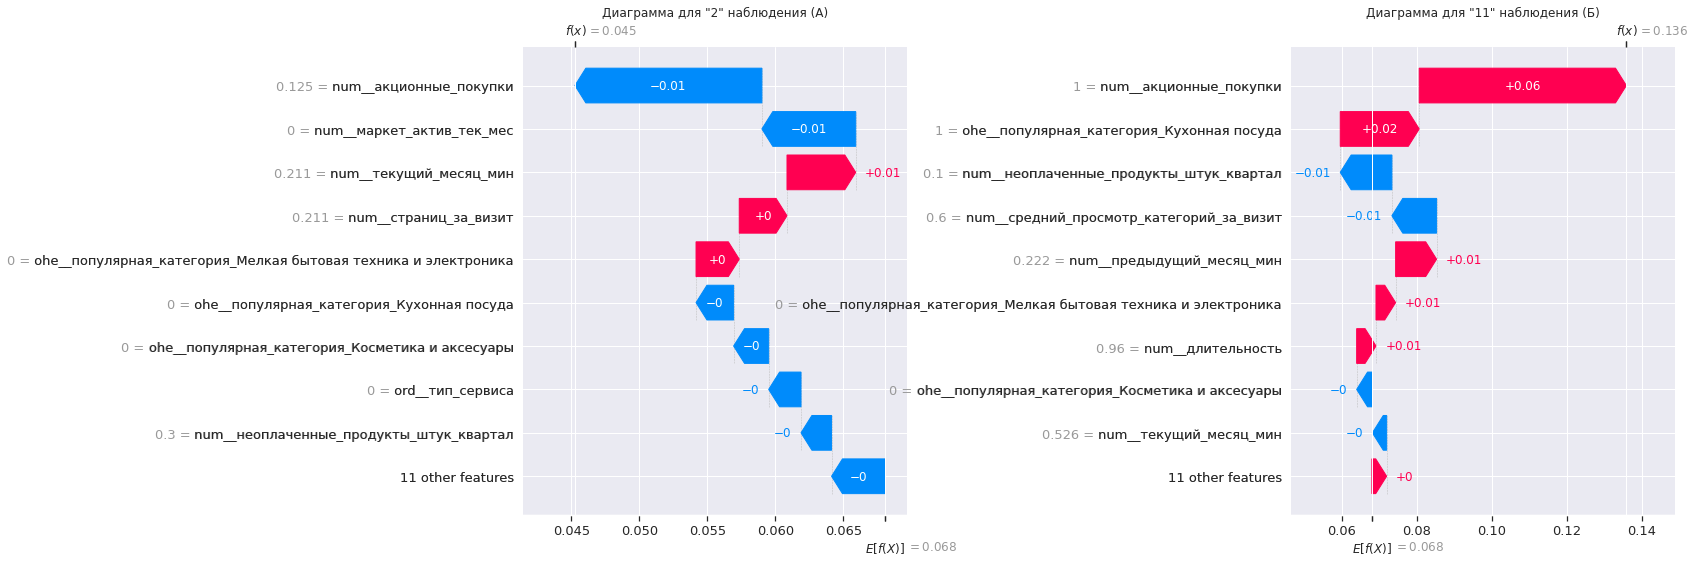

In [68]:
plt.figure()
plt.subplot(1,2,1)
plt.title(f'Диаграмма для "2" наблюдения (А)')
shap.plots.waterfall(shap_values_scv[1,:,1], show=False) 

plt.subplot(1,2,2)
plt.title(f'Диаграмма для "11" наблюдения (Б)')
shap.plots.waterfall(shap_values_scv[10,:,1], show=False) 


# Optional for adjusting the margins:
plt.subplots_adjust(
    left=0,
    bottom=0, 
    right=2, 
    top=1,
    wspace=1,
)
plt.show()

Наблюдение "1" - сильнее всего на классификацию наблюдения влияют признаки "препредыдущий_месяц_выручка" они «перетягивает» предсказание в сторону класса 1.

Наблюдение "10" - сильнее всего на классификацию наблюдения влияют признаки средний_просмотр_категорий_за_визит", "предыдущий_месяц_минут" и "акционные_покупки" они «перетягивает» предсказание в сторону класса 0.

<a id='section_7_2'></a>

#### 7.2. Промежуточный вывод

Чем больше значения признаков <b>страниц_за_визит, предыдущий_месяц_мин, текущий_месяц_мин, средний_просмотр_категорий_за_визит, маркет_актив_6_мес </b>, тем меньше SHAP‑значения объектов. Т.е. для данного наблюдения высокая вероятность принадлежности к классу 0.
Чем больше значение признаков <b>акционные_покупки, неоплаченные_продукты_штук_квартал</b>, тем выше SHAP-значения. Т.е. для данного наблюдения высокая вероятность принадлежности к классу 1.

<a id='section_8'></a>

### 8. Сегментация покупателей

Выполним сегментацию покупателей и сделаем графическое и аналитическое исследование выбранной группы покупателей.

<a id='section_8_1'></a>

#### 8.1. Сегментация покупателей

Посчитаем вероятность снижения для нашего датасета.

In [69]:
X_segment = pd.DataFrame(
    data_preprocessor.transform(result_data.drop(
        ['id','покупательская_активность'], axis=1)),
    columns=data_preprocessor.get_feature_names_out()    
)
y = label_encoder.transform(result_data['покупательская_активность'])


model_svc_segm = grid_search_svc.best_estimator_['models']
model_svc_segm.fit(X_segment, y)
y_pred_segment = model_svc_segm.predict_proba(X_segment)[:,1]

Добавим в наш датасет данные из датасета money и добавим столбец с предсказанием вероятности.

In [70]:
df = result_data.merge(money_data, on='id')
df['вероятность'] = y_pred_segment
display(df.head())
df.shape

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_мин,текущий_месяц_мин,прибыль,вероятность
0,215349,Снизилась,премиум,да,4.4000000000,4,819,0.7500000000,Товары для детей,4,4,2,5,5_216.0000000000,4_472.0000000000,4_971.6000000000,12,10,4.1600000000,0.9660016659
1,215350,Снизилась,стандарт,нет,4.9000000000,3,539,0.1400000000,Домашний текстиль,5,2,1,5,5_457.5000000000,4_826.0000000000,5_058.4000000000,8,13,3.1300000000,0.5218931200
2,215351,Снизилась,стандарт,да,3.2000000000,5,896,0.9900000000,Товары для детей,5,0,6,4,6_158.0000000000,4_793.0000000000,6_610.4000000000,11,13,4.8700000000,0.9309637458
3,215352,Снизилась,стандарт,нет,5.1000000000,3,1064,0.9400000000,Товары для детей,3,2,3,2,5_807.5000000000,4_594.0000000000,5_872.5000000000,8,11,4.2100000000,0.9613746813
4,215353,Снизилась,стандарт,да,3.3000000000,4,762,0.2600000000,Домашний текстиль,4,1,1,4,4_738.5000000000,5_124.0000000000,5_388.5000000000,10,10,3.9500000000,0.8280013256


(1297, 20)

Посмотрим на распределение нашей прибыли от вероятности снижения покупательской активности

In [71]:
def graph_scat_plot(df, feature, target_feature, cat=None):
    fig, ax = plt.subplots(figsize=(8, 8))
    # pal = sns.color_palette("Oranges", len(df))
    sns.set_color_codes("muted")
    # fig.tight_layout(pad=2)
    axx = sns.scatterplot(data=df, 
                          x=target_feature, 
                          y=feature, 
                          hue=cat,
                          color='orange', 
                          linewidth = 0.6,
                          edgecolor = "black",
                          alpha=0.95,
                     )

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    axx.legend(fontsize=8, loc=1)
    ax.set_xlabel(target_feature, fontsize=12, fontweight="bold")
    ax.set_ylabel(feature, fontsize=12, fontweight="bold")
    # ax.set_title(feature.upper(), fontsize=12, fontweight="bold")
    # ax.set_ylim(0.69, 0.72)

    fig.suptitle('Распределение'.upper(), fontname="Comic Sans MS", fontsize=15, fontweight="bold");
    plt.show()

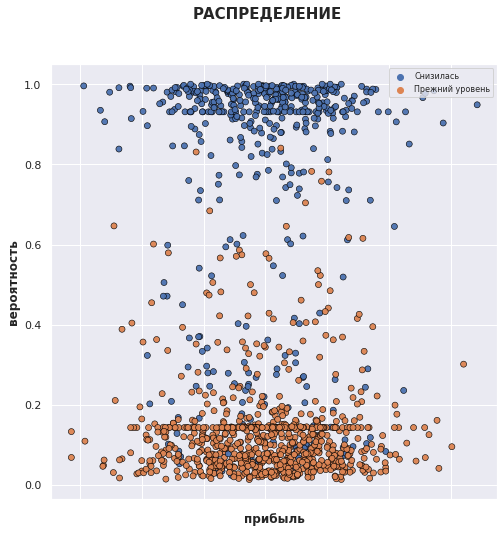

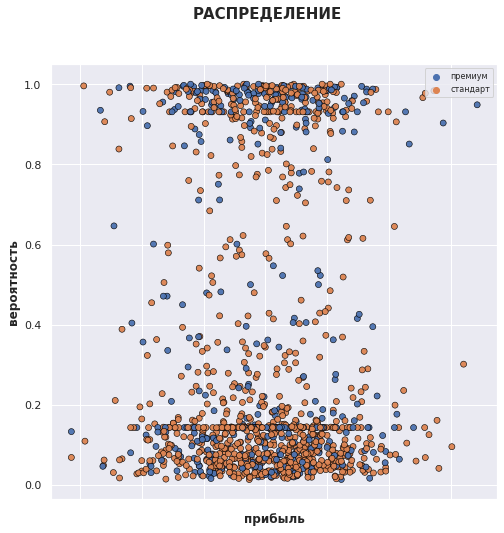

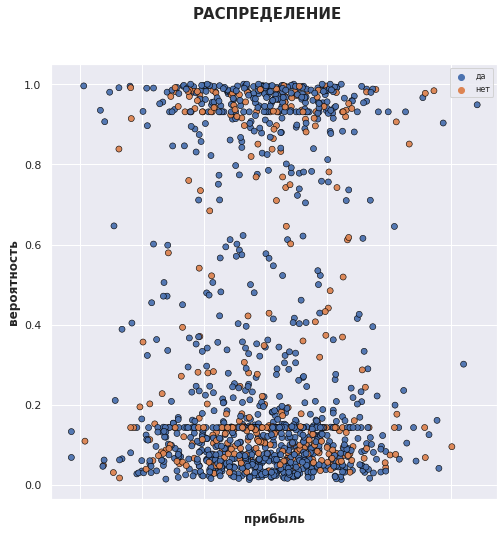

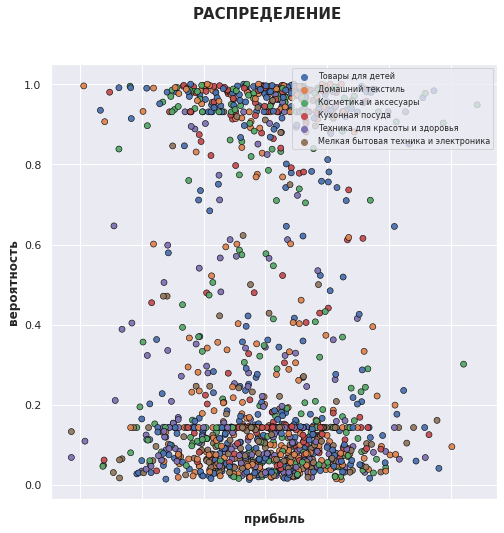

In [72]:
th = df.select_dtypes('object').columns.to_list()
for i in th:
    graph_scat_plot(df, 'вероятность', 'прибыль', i)

По диаграмме рассеяния с выделением категорий "покупательской активности" видно, что есть четкаая граница, когда снижения покупательской способности. 
Зададим порог равный 0.65 и отберем пользователей с вероятностью снижения на основе данного порога

In [73]:
threshold = 0.65
mask = y_pred_segment > threshold
mask.sum()

389

Всего таких пользователей 393. Отберем всех пользователей под данной условие.

In [74]:
df = df[mask]
display(df.head())
df.shape

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_мин,текущий_месяц_мин,прибыль,вероятность
0,215349,Снизилась,премиум,да,4.4000000000,4,819,0.7500000000,Товары для детей,4,4,2,5,5_216.0000000000,4_472.0000000000,4_971.6000000000,12,10,4.1600000000,0.9660016659
2,215351,Снизилась,стандарт,да,3.2000000000,5,896,0.9900000000,Товары для детей,5,0,6,4,6_158.0000000000,4_793.0000000000,6_610.4000000000,11,13,4.8700000000,0.9309637458
3,215352,Снизилась,стандарт,нет,5.1000000000,3,1064,0.9400000000,Товары для детей,3,2,3,2,5_807.5000000000,4_594.0000000000,5_872.5000000000,8,11,4.2100000000,0.9613746813
4,215353,Снизилась,стандарт,да,3.3000000000,4,762,0.2600000000,Домашний текстиль,4,1,1,4,4_738.5000000000,5_124.0000000000,5_388.5000000000,10,10,3.9500000000,0.8280013256
5,215354,Снизилась,стандарт,да,5.1000000000,3,431,0.2300000000,Косметика и аксесуары,2,3,7,2,5_685.0000000000,4_503.0000000000,5_869.6000000000,11,12,3.6200000000,0.8568538711


(389, 20)

<a id='section_8_2'></a>

#### 8.2. Анализ покупательской группы

Проведем анализ выбранной группы. Построим графики распределения для числовых и категориальных признаков 

In [75]:
def graph_num_plot(df, df_hs, feature):

    mean = df[feature].mean()
    median = np.median(df[feature])
    
    mean_hs = df_hs[feature].mean()
    median_hs = np.median(df_hs[feature])

    fig, axes = plt.subplots(1,2, figsize=(12, 3))


    # axes[0].set_title('sasasa')
    ax1 = sns.histplot(data=df, 
                x=feature, 
                color='orange',
                kde=True,
                alpha = 0.9,
                edgecolor='b', 
                linewidth=1,
                # stat='density',
                line_kws={'lw': 1},
                bins=25,
                ax=axes[0]
               )
    ax1.set_title(f'распределение')
    ax1.set_xlabel('')
    ax1.set_ylabel('Кол-во')
    ax1.lines[0].set_color('k')

    axes[0].axvline(median, color='r', linewidth=2, linestyle='dashed', label=f'среднее - {median:.4f}')
    axes[0].axvline(mean, color='k', linewidth=2, label=f'медиана - {mean:.4f}')
    axes[0].legend([f'среднее - {mean:.4f}', f'медиана - {median:.4f}'])

    
    # axes[0].set_title('sasasa')
    ax2 = sns.histplot(data=df_hs, 
                x=feature, 
                color='orange',
                kde=True,
                alpha = 0.9,
                edgecolor='b', 
                linewidth=1,
                # stat='density',
                line_kws={'lw': 1},
                bins=25,
                ax=axes[1]
               )
    ax2.set_title(f'распределение')
    ax2.set_xlabel('')
    ax2.set_ylabel('Кол-во')
    ax2.lines[0].set_color('k')

    axes[1].axvline(median_hs, color='r', linewidth=2, linestyle='dashed', label=f'среднее - {median_hs:.4f}')
    axes[1].axvline(mean_hs, color='k', linewidth=2, label=f'медиана - {mean_hs:.4f}')
    
    axes[1].legend([f'среднее - {mean_hs:.4f}', f'медиана - {median_hs:.4f}'])

    # fig.legend()
    fig.suptitle(feature.upper(), fontname="Comic Sans MS", fontsize=12, y=1.15, fontweight="bold")
    plt.show()

Проанализируем отдельно группу пользователей, которые совершают покупки по акциям, т.е. тех у которых доля акционных покупок превышает 0.85 от общего количества и сравним с общей группой.

In [76]:
df_high_sale = df.query('акционные_покупки > 0.85')
display(df_high_sale.head())
df_high_sale.shape

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_мин,текущий_месяц_мин,прибыль,вероятность
2,215351,Снизилась,стандарт,да,3.2000000000,5,896,0.9900000000,Товары для детей,5,0,6,4,6_158.0000000000,4_793.0000000000,6_610.4000000000,11,13,4.8700000000,0.9309637458
3,215352,Снизилась,стандарт,нет,5.1000000000,3,1064,0.9400000000,Товары для детей,3,2,3,2,5_807.5000000000,4_594.0000000000,5_872.5000000000,8,11,4.2100000000,0.9613746813
13,215364,Снизилась,премиум,да,4.3000000000,4,708,0.9800000000,Домашний текстиль,3,3,3,3,5_795.5000000000,4_942.0000000000,5_484.8000000000,11,9,2.6700000000,0.9948227732
14,215365,Снизилась,стандарт,да,3.9000000000,4,167,0.9500000000,Техника для красоты и здоровья,6,4,2,5,4_577.0000000000,4_190.0000000000,4_799.3000000000,6,10,3.6500000000,0.9309973598
22,215373,Снизилась,премиум,нет,3.8000000000,3,811,0.9000000000,Товары для детей,2,5,5,3,4_632.0000000000,4_293.0000000000,5_161.1000000000,10,8,3.6900000000,0.9899742622


(128, 20)

<Figure size 432x288 with 0 Axes>

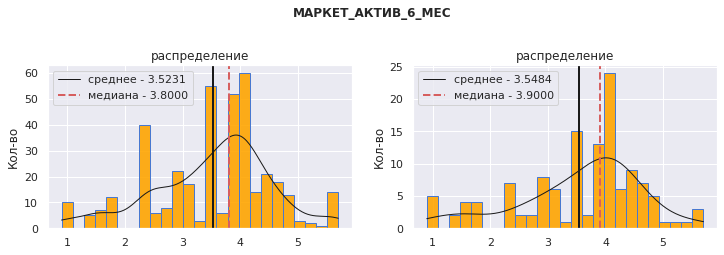

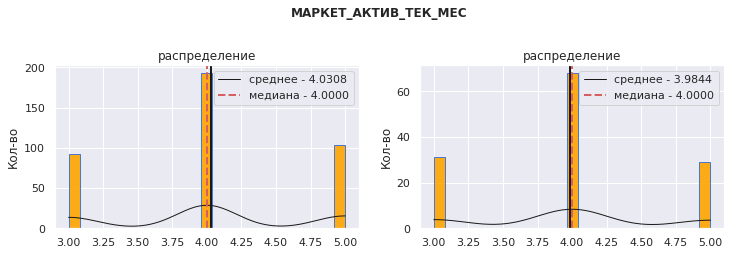

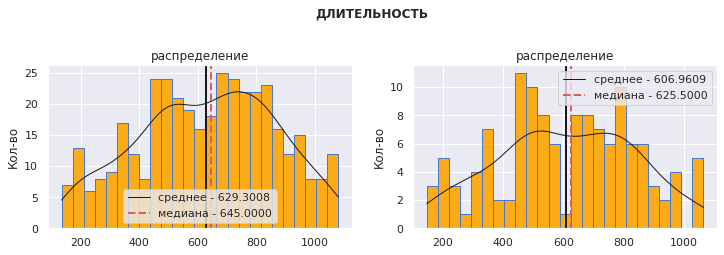

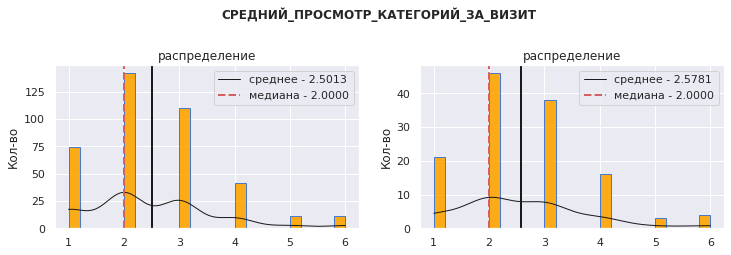

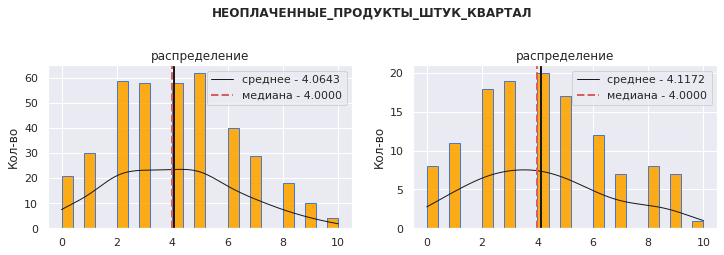

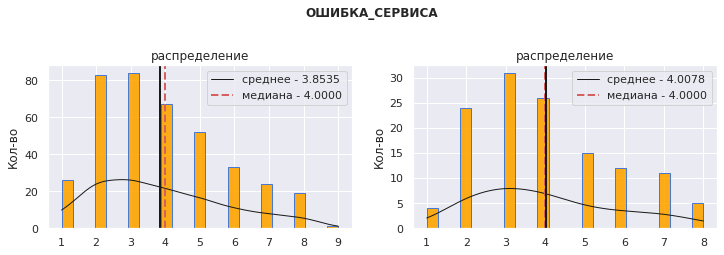

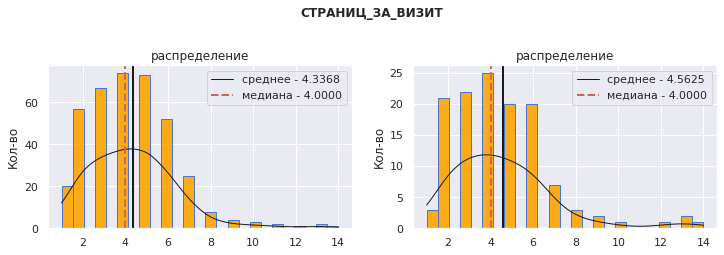

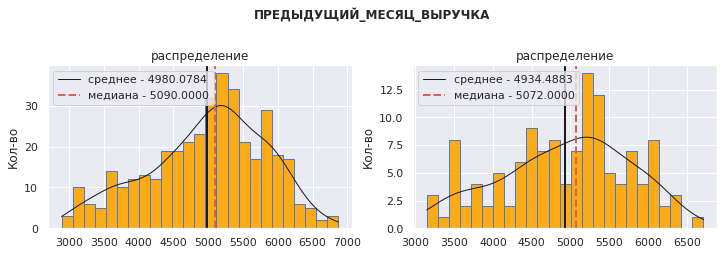

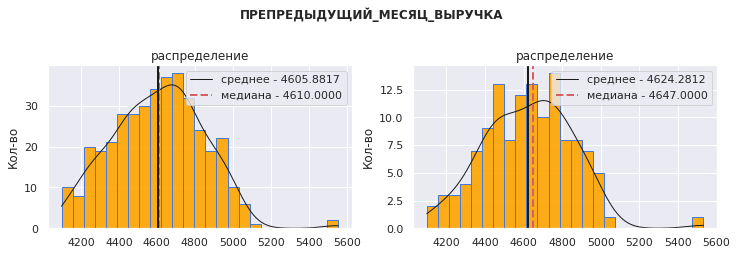

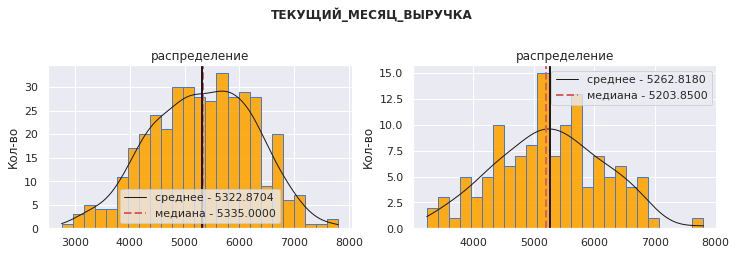

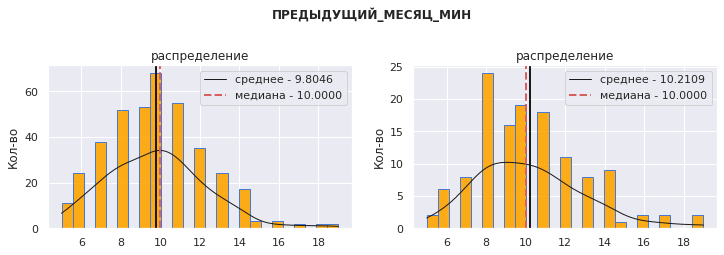

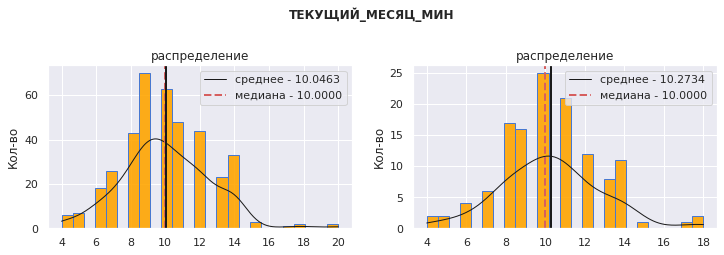

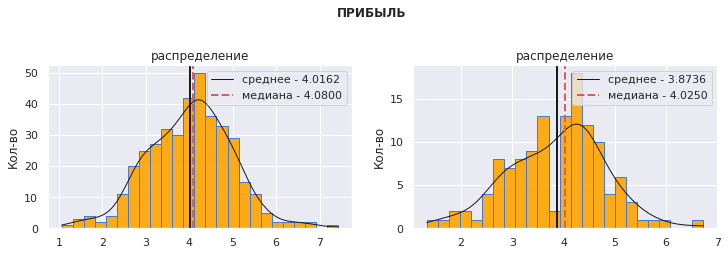

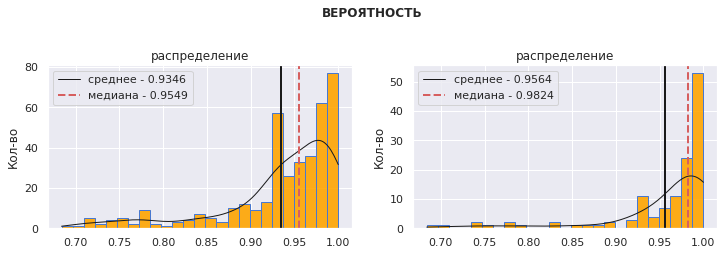

In [77]:
plt.figure()
num_col = df.drop(columns=['id','акционные_покупки']).select_dtypes('number').columns
for i in num_col:
    graph_num_plot(df, df_high_sale, i)

- Количество маркетинговых коммуникаций в среднем равно 3.63, медиана 3.9. Если сравнивать с общей массой, то активность оказывается больше. Среднее для всех пользователей составляет 3.53 (медиана 3.8).
- Маркетинговая активность за текущий месяц равна 4 (медиана и среднее почти совпадают).Значение не отличается от общей массы.
- В среднем данные пользователи были зарегистрированы раньше. Среднее количество дней с момента регистрации покупателя на сайте равняется 608 (медиана 625). Для всех ползователей данные значения составляют 631 и 657 дней.
- Пользователи данной категории в основном просмативают 2.7 категории (медиана 2.5), для остальных пользователей значение равняется 2.5 (мед.2)
- Количество неоплаченных покупок в корзине не отличается и равно 4.
- Пользователи сталкиваются с ошибками сервиса в большей степени, среднее и медиана равны 4. Для общей группы 3.8 (мед.4)
- Количество просматриваемых страниц за один визит равняется 5 (медиана), для общей группы - 4 (медиана).

<a id='section_8_3'></a>

#### 8.3. Анализ важности признаков покупательской группы

Посмотрим на важность признаков и посмотрим какие склоняют нашу модель к классу покупательская_активность == "снизилась"

In [78]:
X_high_sale = df_high_sale.drop(['id','покупательская_активность','вероятность', 'прибыль'], axis=1)

X_high_sale_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_high_sale),
    columns=data_preprocessor.get_feature_names_out()
)

# model_svc = grid_search_svc.best_estimator_['models']
# model_svc.fit(X_train_p, y_train)
explainer_svc_seg = shap.Explainer(model_svc_segm.predict_proba, X_high_sale_p[:100])

In [79]:
shap_values_scv_seg = explainer_svc_seg(X_high_sale_p[:100])

PermutationExplainer explainer: 101it [01:45,  1.15s/it]                         


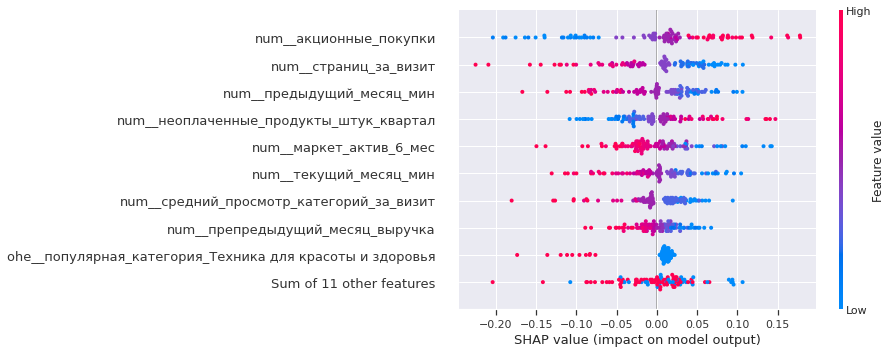

In [80]:
shap.plots.beeswarm(shap_values_scv_seg[:,:,1], show=True)

Для больших значений признаков <b>страниц_за_визит, предыдущий_месяц_мин, текущий_месяц_мин, акционные_покупки, средний_просмотр_категорий_за_визит, маркет_актив_6_мес, популярная_категория (Техника для красоты и здоровья), тип_сервиса (стандарт)</b> меньше SHAP‑значения объектов и больше вероятность принадлежности к классу "0".
Для больших значений признаков <b>неоплаченные_продукты_штук_квартал</b> больше SHAP‑значения объектов и высокая вероятность принадлежности к классу "1".

Таким образом влияя на данные признаки можно попробовать повысить покупательскую способность пользователей. Для данной категории, может быть:
- повышение маркетинговых коммуникаций компании, выбор дополнительного канала оповещения об акциях (акциях по интересующим категориям)
- настраивание канала коммуникации, пользователь мог перейти на другую почту, сменить телефон и просто не получает предложения.
- большая информативность о проведении акций.
- могут предоставляться дополнительные скидки на товары, которые были отложены в корзину и находящиеся там длительное время.
- особые предложение при покупке товаров одной категории.
- могут быть персонализировано присылатся или показываться на сайте предложения по интересующей категории.
- уменьшено количество ошибок сервера, с которыми пользователи могут сталкиваться.

Для информативности построим диаграммы для двух наблюдений

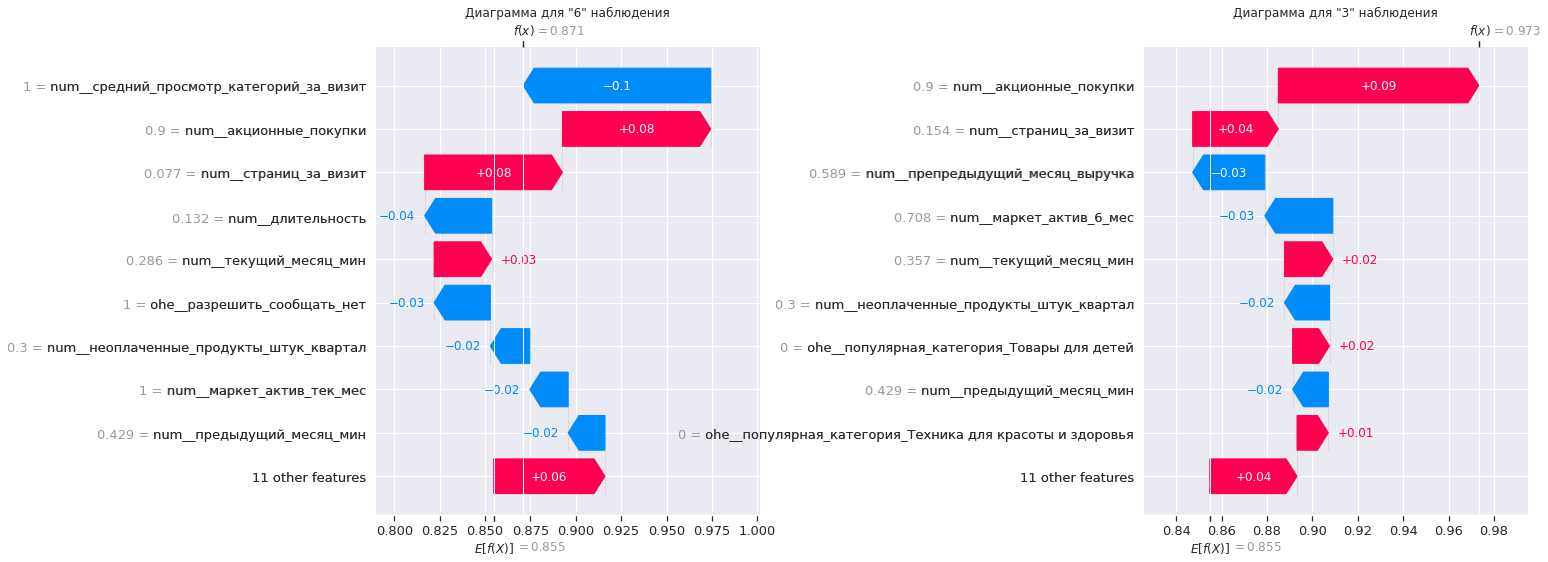

In [81]:
plt.figure()
plt.subplot(1,2,1)
plt.title(f'Диаграмма для "6" наблюдения')
shap.plots.waterfall(shap_values_scv_seg[5,:,1], show=False) 

plt.subplot(1,2,2)
plt.title(f'Диаграмма для "3" наблюдения')
shap.plots.waterfall(shap_values_scv_seg[2,:,1], show=False) 


# Optional for adjusting the margins:
plt.subplots_adjust(
    left=0,
    bottom=0, 
    right=2, 
    top=1,
    wspace=1,
)
plt.show()

Для второго наблюдения в сторону класса "0" сильнее всего перетягивают признаки <b>страниц_за_визит</b>, признаки <b>предыдущий_месяц_выручка, акционные_покупки</b> наоборот перетягивают в сторону класса "1".

Для третьего наблюдения в сторону класса "0" сильнее всего перетягивают признаки <b>предыдущий_месяц_мин</b>, признаки <b>предыдущий_месяц_выручка, акционные_покупки</b> и <b>текущий_месяц_мин</b> наоборот перетягивают в сторону класса "1".

<a id='section_8_4'></a>

#### 8.4. Промежуточный вывод

- Количество маркетинговых коммуникаций в среднем равно 3.6, медиана 3.9. Если сравнивать с общей массой, то активность оказывается меньше. Среднее для всех пользователей составляет 4.25 (медиана 4.2).
- Маркетинговая активность за текущий месяц равна 4 (медиана и среднее почти совпадают).Значение не отличается от общей массы.
- В среднем данные пользователи были зарегистрированы раньше. Среднее количество дней с момента регистрации покупателя на сайте равняется 614 (медиана 627). Для всех ползователей данные значения составляют 602 и 606 дней.
- Пользователи данной категории в основном просмативают 2 категории, для остальных значени равняется 3.
- Количество неоплаченных покупок в корзине больше чем для общей группы. Значение свещено в сторону 4х. Для общей группы 1, 2.
- Пользователи сталкиваются с ошибками сервиса в меньшей степени (равно 3). Для общей группы 4.
- Количество просматриваемых страниц за один визит почти в два раза меньше в сравнении с общей группой. Среднее значение равняется 4.75 (медиана), для общей группы - среднее 8.17, медиана 8.
Товары для детей приносят максимальную выручку. За препредыдущий месяц выручка увеличилась несильно. Скачок между предыдущем и текущим месяцем составил чуть менее 4т. (порядка 3%).

Для больших значений признаков <b>страниц_за_визит, предыдущий_месяц_мин, текущий_месяц_мин, средний_просмотр_категорий_за_визит, маркет_актив_6_мес</b> меньше SHAP‑значения объектов и больше вероятность принадлежности к классу "0".
Для больших значений признаков <b>акционные_покупки, неоплаченные_продукты_штук_квартал</b> больше SHAP‑значения объектов и высокая вероятность принадлежности к классу "1

<a id='section_9'></a>

### 9. Общий вывод

Нам поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
Предоставленные данные содержат 4 датасета:
- датасет <b>market_file.csv</b>, содержащий информацию о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- датасет <b>market_money.csv</b>, в котором храняться данные о том сколько покупатель всего потратил за период взаимодействия с сайтом.
- датасет <b>market_time.csv</b> с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. Содержатся столбцы:
- датасет <b>money.csv</b> с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. 


Для проведения анализа мы выполнили несколько шагов:
- <b>Загрузили и исследовали данные</b>. Посмотрели на количество данных, количество пропущенных значений и формат представленных данных. Посмотрели, соответствуют ли они описанию задачи и стандартам оформления данных.

    - Первый датасет <b>market_file_data</b> состоит из 1300 строк и 13 столбцов.содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    - Второй датасет <b>market_money_data</b> состоит из 3900 строк и 3 столбцов. В столбце указана информация о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
    - Третия датасет <b>market_time_data</b> состоит из 2600 строк и 3 столбцов. В нем расшифрована информация с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
    - Четвертый датасет <b>money_data</b> состоит из 1300 строк и 2 столбцов. В нем расшифрована информация с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

Во всех датасетах пропущенных значений нет. Формат данных указан верно, кроме столбца "минут" в датасете <b>market_time_data</b>.
В названия столбцов избавились от пробелов и были приведены к нижнему регистру.


- <b>Сделали предобработку данных</b>. Для двух столбцов исправлено название категорий.

Были исправлены ошибка в написании категории "стандартт" в столбце "Тип сервиса" датасета <b>market_file_data</b>. Так же в название столбцов, в некоторых, указаны "пробелы", в некоторых символ "_".
В датасете <b>market_time_data</b> исправлена ошибка в написание категории "предыдцщий_месяц". 
Названия столбцов с большой и малой буквы приведены к нижнему регистру.


- <b>Провели исследовательский анализ данных</b> и отобрали клиентов с покупательской активностью не менее трёх месяцев.

В датасете <b>market_file_data</b>:
  - среднемесячное значение маркетинговых коммуникаций компании <b>маркет_актив_6_мес</b>, которое приходилось на покупателя за последние 6 месяцев равняется 4.25, медиана немного меньше и равняетя 4.2. Есть несколько выбросов - около 1 коммуникация за 6 месяцев.
    - срежнее количество взаимодействий за последний месяц <b>"маркет_актив_тек_мес"</b> равняется 4. Почти в два раза меньшее количество взаимодействий наблюдается для значений "3" и "5" взаимодействий.
    - среднее значение дней прошедших с момента регистрации покупателя на сайте составляет 602, медиана немного больше 606.
    - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев (<b>"акционные_покупки"</b>) составляет 0.32, медиана 0.24. Так же много пользователей, у которых доля покупок по акции составляет 0.9.
    - Средний_просмотр_категорий_за_визит равняется 3, немного меньше пользователей, которые просматривают по 2 и 4 категории за один визит. 
    - больше всего пользователей у которых количество неоплаченных товаров в корзине равняется 1 и 2.
    - среднее значение количества ошибок сервиса, признак <b>"ошибка_сервиса"</b> равняется 4.2.
    - среднее значение количества страниц за визит <b>"страниц_за_визит"</b> равняется 8.2, медиана 8.- среднемесячное значение маркетинговых коммуникаций компании <b>маркет_актив_6_мес</b>, которое приходилось на покупателя за последние 6 месяцев равняется 4.25, медиана немного меньше и равняетя 4.2. Есть несколько выбросов - около 1 коммуникация за 6 месяцев.
    - срежнее количество взаимодействий за последний месяц <b>"маркет_актив_тек_мес"</b> равняется 4. Почти в два раза меньшее количество взаимодействий наблюдается для значений "3" и "5" взаимодействий.
    - среднее значение дней прошедших с момента регистрации покупателя на сайте составляет 602, медиана немного больше 606.
    - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев (<b>"акционные_покупки"</b>) составляет 0.32, медиана 0.24. Так же много пользователей, у которых доля покупок по акции составляет 0.9.
    - Средний_просмотр_категорий_за_визит равняется 3, немного меньше пользователей, которые просматривают по 2 и 4 категории за один визит. 
    - больше всего пользователей у которых количество неоплаченных товаров в корзине равняется 1 и 2.
    - среднее значение количества ошибок сервиса, признак <b>"ошибка_сервиса"</b> равняется 4.2.
    - среднее значение количества страниц за визит <b>"страниц_за_визит"</b> равняется 8.2, медиана 8.

    - в признаке "покупательская_активность" активность большинства пользователей осталось на прежнем уровне 802, для 498 пользователей активность снизилась.
    - признак "тип_сервиса" - большинство покупателей пользуются стандартной подпиской (924 пользоваетеля), премиальной подпиской пользуются 376 пользователя.
    - признак "разрешить_сообщать" - большинство пользователей разрешают присылать дополнительные предложения о товаре (962 пользователя), остальная часть, 338 пользователей, свое согласие не дали.
    - в признаке "популярная_категория" представлено 6 категорий. Наибольшим спросом пользуется кактегория "товары для детей" (330 пользователя). Потом идут категории "домашний текстиль" (251 пользователь) и "косметика и аксесуары" (223 пользователя). Наименьшим спросом пользуется категория "кухонная посуда" (138 пользователей).- в признаке "покупательская_активность" активность большинства пользователей осталось на прежнем уровне 802, для 498 пользователей активность снизилась.
    - признак "тип_сервиса" - большинство покупателей пользуются стандартной подпиской (924 пользоваетеля), премиальной подпиской пользуются 376 пользователя.
    - признак "разрешить_сообщать" - большинство пользователей разрешают присылать дополнительные предложения о товаре (962 пользователя), остальная часть, 338 пользователей, свое согласие не дали.
    - в признаке "популярная_категория" представлено 6 категорий. Наибольшим спросом пользуется кактегория "товары для детей" (330 пользователя). Потом идут категории "домашний текстиль" (251 пользователь) и "косметика и аксесуары" (223 пользователя). Наименьшим спросом пользуется категория "кухонная посуда" (138 пользователей).

В датасете <b>market_money_data</b> аномальных значений не видно. По графикам видно, что среднее значение выручки увеличивается. Медиана для всех периодов не сильно отличается от среднего.Аномальных значений не видно. По графикам видно, что среднее значение выручки увеличивается. Медиана для всех периодов не сильно отличается от среднего.

В датасете <b>market_time_data</b> аномальных значений не видно. Среднее немного уменьшилось и с 13.4 стало 13.2. Медианное значение не поменялось.Аномальных значений не видно. Среднее немного уменьшилось и с 13.4 стало 13.2. Медианное значение не поменялось.

В датасете <b>money_data</b> среднее и медиана очень близки. Среднее значение признака составляет 3.9966, медианна - 4.0450. Распределение имеет несимметричный вид, заметна скошенность влево, $\overline{x} < M_{e}$.Среднее и медиана очень близки. Среднее значение признака составляет 3.9966, медианна - 4.0450. Распределение имеет несимметричный вид, заметна скошенность влево, $\overline{x} < M_{e}$.

- <b>Сформировали общий датасет</b> на основе таблицы market_file.csv, market_money.csv, market_time.csv. В итоговой таблице сделали отдельный столбец для каждого периода. Размер получившегося датасета равняется 1300 строк и 18 столбцов.

- <b>Провели коорреляционный анализ</b> признаков в количественной шкале.

    Видны зависимости между некоторыми признаками, при этом максимальный коэффициент корреляции не превышает 0.75. Видны следующие закономерности:
    - Корреляция между признаками <b>"препредыдущий_месяц_выручка"</b> и <b>"акционные_покупки"</b> равняется 0.75 (высокая связь по шкале Чеддока).
    -  Корреляция между признаками <b>"препредыдущий_месяц_выручка"</b> и <b>"предыдущий_месяц_выручка"</b> равняется 0.73 (высокая связь по шкале Чеддока).
    - Корреляция между признаками <b>"предыдущий_месяц_выручка"</b> и <b>"текущий_месяц_выручка"</b> равняется 0.7 (высокая связь по шкале Чеддока).
    - Корреляция между признаками <b>"предыдущий_месяц_выручка"</b> и <b>"акционные_покупки"</b> равняется 0.64 (заметная теснота связи по шкале Чеддока).

    В остальных случаях корреляция между признаками маленькая и не превышает 0.4.

    Целевой признак связан c признаками:
    - <b>"страниц за визит"</b>, кор-я 0.75 (высокая связь по шкале Чеддока с признаком )
    - <b>"предыдущий_месяц_мин"</b>, кор-я 0.68 (средняя теснота связи по шкале Чеддока с признаком)
    - <b>"текущий_месяц_мин"</b>, кор-я 0.58 (средняя теснота связи по шкале Чеддока с признаком)
    - <b>"маркет_актив_6_мес"</b>, кор-я 0.55 (средняя теснота связи по шкале Чеддока с признаком)
    - <b>"средний_просмотр_категорий_за_визит"</b>, кор-я 0.53 (средняя теснота связи по шкале Чеддока с признаком)
    - <b>"неоплаченные_продукты_штук_за_квартал"</b>, кор-я 0.5 (средняя теснота связи по шкале Чеддока с признаком)
    - <b>"акционные_покупки"</b>, кор-я 0.5 (слабая теснота связи по шкале Чеддока с признаком)
    - <b>"препредыдущий_месяц_выручка"</b>, кор-я 0.48 (слабая теснота связи по шкале Чеддока с признаком)

Для остальных признаков наблюдается очень слабая теснота связи с целевым признаком. 
На сонове полученных значений связи целевого признака, при обучении модели, можно отобрать именно признаки с большим значением тесноты связи и посмотреть как поменяется значение метрики.

- <b>Построили модели</b> на основе KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и  SVC. Для каждой модели были подобраны гиперпараметры.
Был построен пайплайн и обучена модель на итоговом датасете. При выборе модели были обучены четыре модели: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и SVC. В качестве метрики была выбрана "roc_auc" так как она устойчива к неравновесным выборкам. 
    - Среди рассмотренных моделей лучшиее значение получилось для SVC, значение метрики на тестовой выборке составило 0,873. 
    - После расширения списка гиперпараметров удалось поднять метрику до 0.88. 
    - Обучение лучшей модели на выбранных признаках по корреляции с целевым позволила поднять значение метрики до 0.882. 
    - Расширение пайплайна функцией SelectKBest и автоматический подбор признаков позволил поднять значение до 0.8852. Лучшее значение метрики по тестовой выбрке  получилось для модели SVC c параметрами C=1, coef0=0.0001, degree=1, random_state=42. В качестве признаков были выбраны категориальные: 'тип_сервиса', 'популярная_категория' и числовые 'маркет_актив_тек_мес', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'препредыдущий_месяц_выручка', 'предыдущий_месяц_мин', 'текущий_месяц_мин'. Значение метрики составило 0.8857.
    - Обход с использованием пайплайна с функцией SelectKBest по признакам выбранным на основе корреляции с целевым лучшего значения метрики не дал. На тестовой выборке значение равнялось 0.8827.

- <b>Провели анализ важности признаков</b>. Посмотрим какие признаки влияют больше всего, а какие меньше.
Чем больше значения признаков <b>страниц_за_визит, предыдущий_месяц_мин, текущий_месяц_мин, средний_просмотр_категорий_за_визит, маркет_актив_6_мес </b>, тем меньше SHAP‑значения объектов. Т.е. для данного наблюдения высокая вероятность принадлежности к классу 0.
Чем больше значение признаков <b>акционные_покупки, неоплаченные_продукты_штук_квартал</b>, тем выше SHAP-значения. Т.е. для данного наблюдения высокая вероятность принадлежности к классу "1".

- <b>Сделали сегментацию покупателей и провели их анализ</b> на основе результатов моделирования и данных о прибыльности покупателей. 
- Количество маркетинговых коммуникаций в среднем равно 3.63, медиана 3.9. Если сравнивать с общей массой, то активность оказывается больше. Среднее для всех пользователей составляет 3.53 (медиана 3.8).
- Маркетинговая активность за текущий месяц равна 4 (медиана и среднее почти совпадают).Значение не отличается от общей массы.
- В среднем данные пользователи были зарегистрированы раньше. Среднее количество дней с момента регистрации покупателя на сайте равняется 608 (медиана 625). Для всех ползователей данные значения составляют 631 и 657 дней.
- Пользователи данной категории в основном просмативают 2.7 категории (медиана 2.5), для остальных пользователей значение равняется 2.5 (мед.2)
- Количество неоплаченных покупок в корзине не отличается и равно 4.
- Пользователи сталкиваются с ошибками сервиса в большей степени, среднее и медиана равны 4. Для общей группы 3.8 (мед.4)
- Количество просматриваемых страниц за один визит равняется 5 (медиана), для общей группы - 4 (медиана).

ля больших значений признаков <b>страниц_за_визит, предыдущий_месяц_мин, текущий_месяц_мин, акционные_покупки, средний_просмотр_категорий_за_визит, маркет_актив_6_мес, популярная_категория (Техника для красоты и здоровья), тип_сервиса (стандарт)</b> меньше SHAP‑значения объектов и больше вероятность принадлежности к классу "0". Для больших значений признаков <b>неоплаченные_продукты_штук_квартал</b> больше SHAP‑значения объектов и высокая вероятность принадлежности к классу "1".

Таким образом влияя на данные признаки можно попробовать повысить покупательскую способность пользователей. Для данной категории, может быть:
- повышение маркетинговых коммуникаций компании, выбор дополнительного канала оповещения об акциях (акциях по интересующим категориям)
- настраивание канала коммуникации, пользователь мог перейти на другую почту, сменить телефон и просто не получает предложения.
- большая информативность о проведении акций.
- могут предоставляться дополнительные скидки на товары, которые были отложены в корзину и находящиеся там длительное время.
- особые предложение при покупке товаров одной категории.
- могут быть персонализировано присылатся или показываться на сайте предложения по интересующей категории.
- уменьшено количество ошибок сервера, с которыми пользователи могут сталкиваться.